## ValidMind Python Library Introduction (for R users)

In [11]:
import pandas as pd

## Initializing the ValidMind Library

After creating an account with ValidMind, we can find the project's API key and secret in the settings page of the ValidMind dashboard:

<img src="https://vmai.s3.us-west-1.amazonaws.com/sdk-images/settings.png" width="600" height="300" />

The library credentials can be configured in two ways:

- By setting the `VM_API_KEY` and `VM_API_SECRET` environment variables or
- By passing `api_key` and `api_secret` arguments to the `init` function like this:

```python
vm.init(
    api_key='<your-api-key>',
    api_secret='<your-api-secret>',
    project="cl2r3k1ri000009jweny7ba1g"
)
```

The `project` argument is mandatory since it allows the library to associate all data collected with a specific account project.

In [2]:
import validmind as vm

vm.init(
      api_host = "http://localhost:3000/api/v1/tracking",
      api_key = "e22b89a6b9c2a27da47cb0a09febc001",
      api_secret = "a61be901b5596e3c528d94231e4a3c504ef0bb803d16815f8dfd6857fac03e57",
      project = "clfmztk8t0000qvoo2wh30ex7"
)

True

### Using a demo dataset

For this simple demonstration, we will use the following bank customer churn dataset from Kaggle: https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction/data.

We will train a sample model and demonstrate the following library functionalities:

- Logging information about a dataset
- Running data quality tests on a dataset
- Logging information about a model
- Logging training metrics for a model
- Running model evaluation tests

Before we logging any data on a new project, the ValidMind dashboard will let users know that they can automatically populate the different documentation sections by integrating the ValidMind into a model development environment:

<img src="https://vmai.s3.us-west-1.amazonaws.com/sdk-images/empty-data-description.png" width="600" height="300">

#### Logging general project metadata with `log_metadata`

The ValidMind library provides a function to log free-form metadata for a project. A list of preconfigured `content_id` can be used to select where in the dashboard documentation we want this metadata to be displayed. As an example, if a model developer wants to populate the `Model Overview` section for a project, they can use `model_overview` as the `content_id`:

```python
vm.log_metadata("model_overview", text="Testing")
```

The `text` argument accepts Markdown formatted text as we'll see in the cell below. The documentation used for this model has been taken from the [Kaggle dataset](https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction/data).

In [3]:
model_overview = """
Testing writing metadata from the framework for R models.

The ValidMind library provides a function to log free-form metadata for a project. A list of preconfigured `content_id` can be used to select where in the dashboard documentation we want this metadata to be displayed. As an example, if a model developer wants to populate the `Model Overview` section for a project, they can use `model_overview` as the `content_id`

We aim to accomplish the following for this study:

- Identify and visualize which factors contribute to customer churn
- Build a prediction model that will perform the following:
  - Classify if a customer is going to churn or not
  - Preferably and based on model performance, choose a model that will attach a probability
  to the churn to make it easier for customer service to target low hanging fruits in their
  efforts to prevent churn
"""

vm.log_metadata(content_id="model_overview", text=model_overview)

True

The dashboard should now display the `Model Overview` section with the text we have provided from the library:

<img src="https://vmai.s3.us-west-1.amazonaws.com/sdk-images/model-overview.png" width="600" height="300">

### Running a dataset evaluation test plan

We will now run a basic tabular dataset test plan that will compute and log the description, metrics and tests for the dataset. For now, ValidMind supports metrics and tests for a single dataset, so we first will combine the test and train sets into one to get complete datapoints.

In [4]:
## load the train and test dataframes
# assume that the train and test datasets have been saved to disk as csv files
# see the r-customer-churn-model.ipynb notebook for details on how this can be done
df_train = pd.read_csv("r_demo/r_churn_train.csv")
df_test = pd.read_csv("r_demo/r_churn_test.csv")

vm_train_ds = vm.init_dataset(dataset=df_train, type="generic", target_column="Exited")
vm_test_ds = vm.init_dataset(dataset=df_test, type="generic", target_column="Exited")


Pandas dataset detected. Initializing VM Dataset instance...
Inferring dataset types...
Pandas dataset detected. Initializing VM Dataset instance...
Inferring dataset types...


Pandas dataset detected. Initializing VM Dataset instance...
Inferring dataset types...


,GeographyFrance,GeographyGermany,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,0.50125,0.251125,0.549500,38.948875,5.033875,76434.096511,1.532500,0.702625,0.519875,99790.187959,0.202000
std,0.50003,0.433687,0.497575,10.458952,2.885267,62612.251258,0.580505,0.457132,0.499636,57520.508892,0.401517
min,0.00000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,0.00000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50857.102500,0.000000
50%,1.00000,0.000000,1.000000,37.000000,5.000000,97263.675000,1.000000,1.000000,1.000000,99504.890000,0.000000
75%,1.00000,1.000000,1.000000,44.000000,8.000000,128044.507500,2.000000,1.000000,1.000000,149216.320000,0.000000
max,1.00000,1.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000

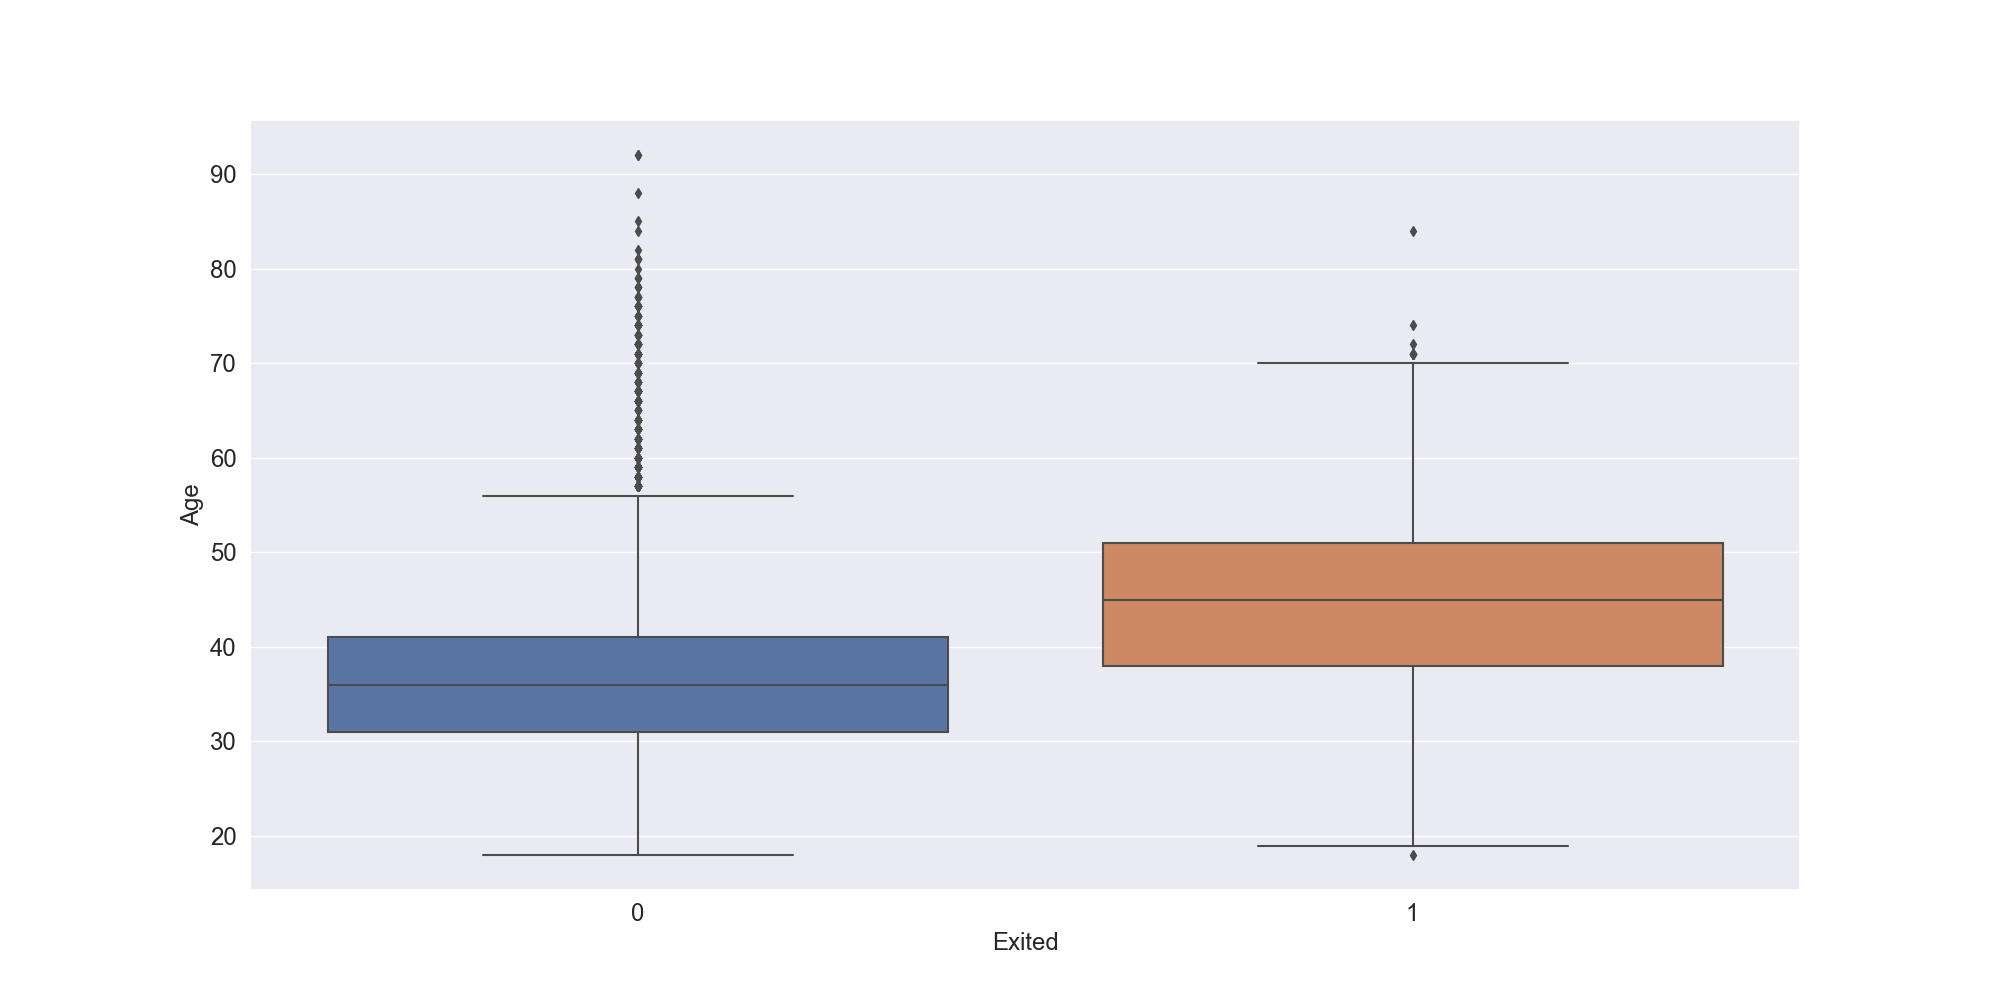
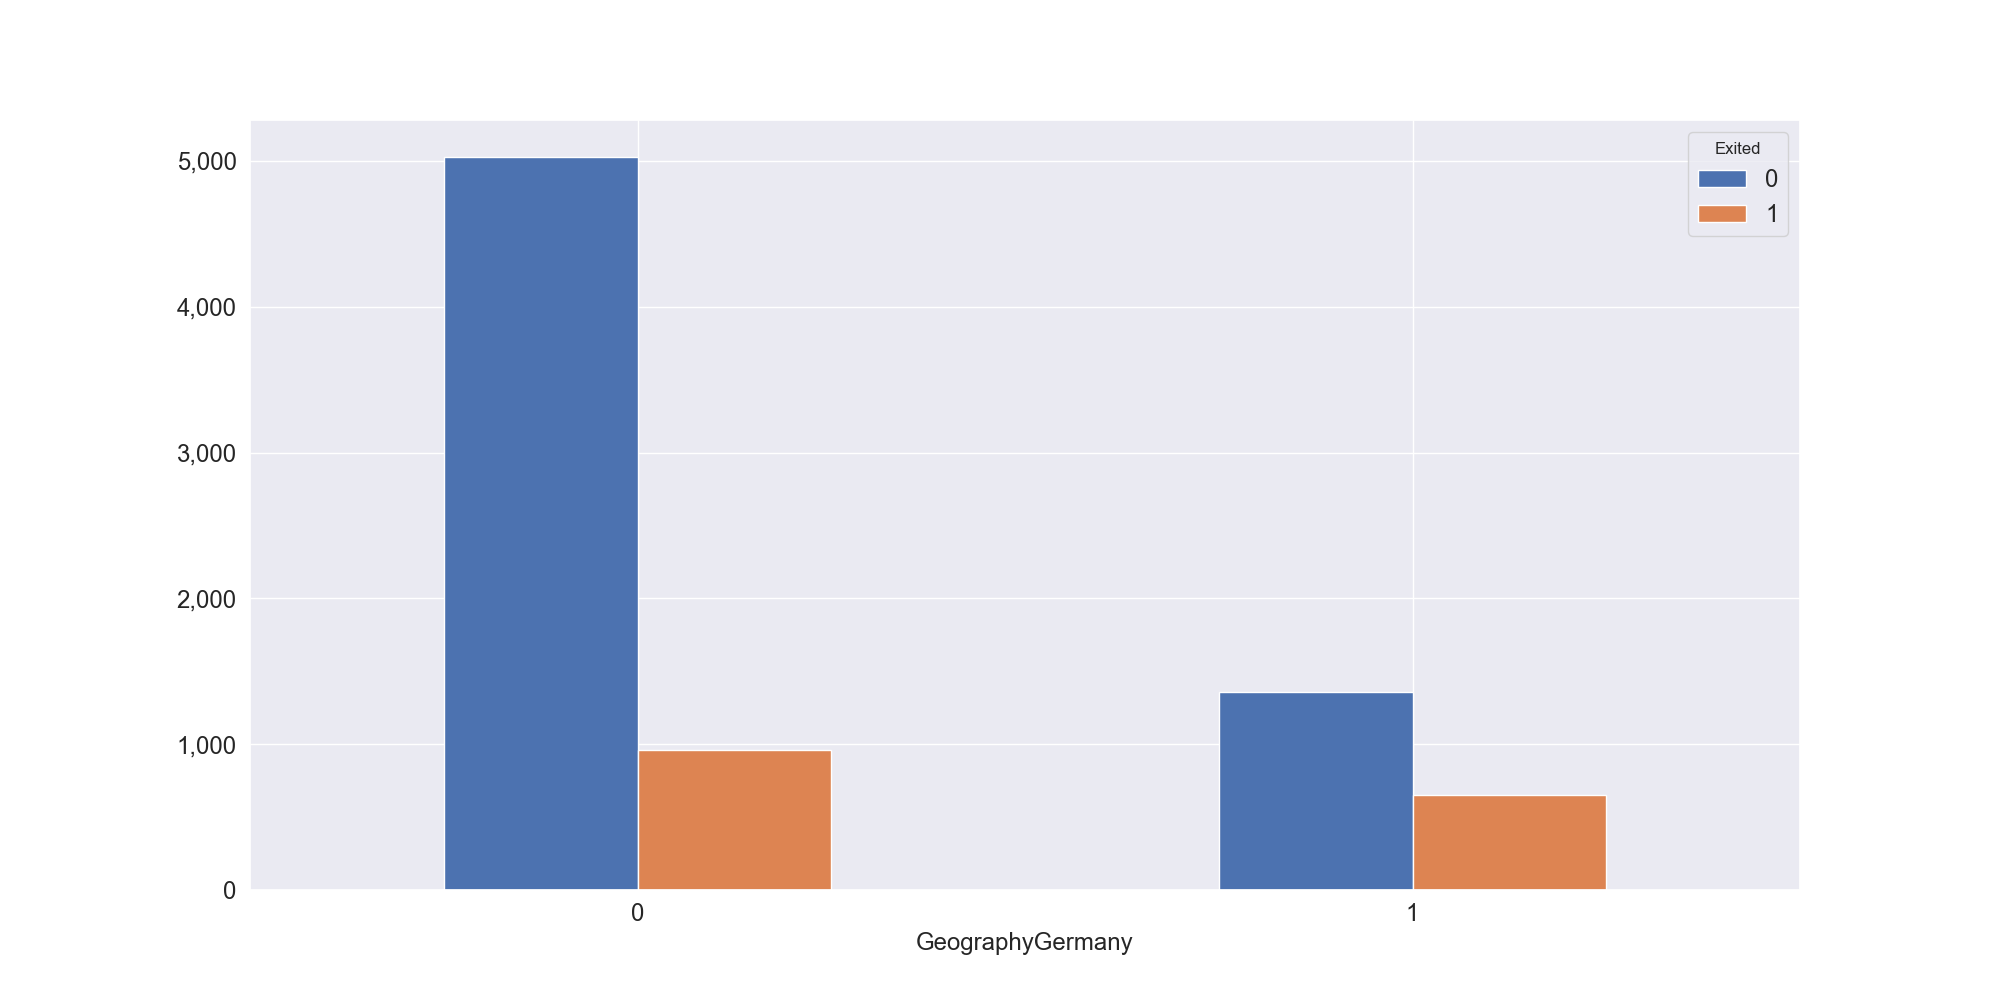
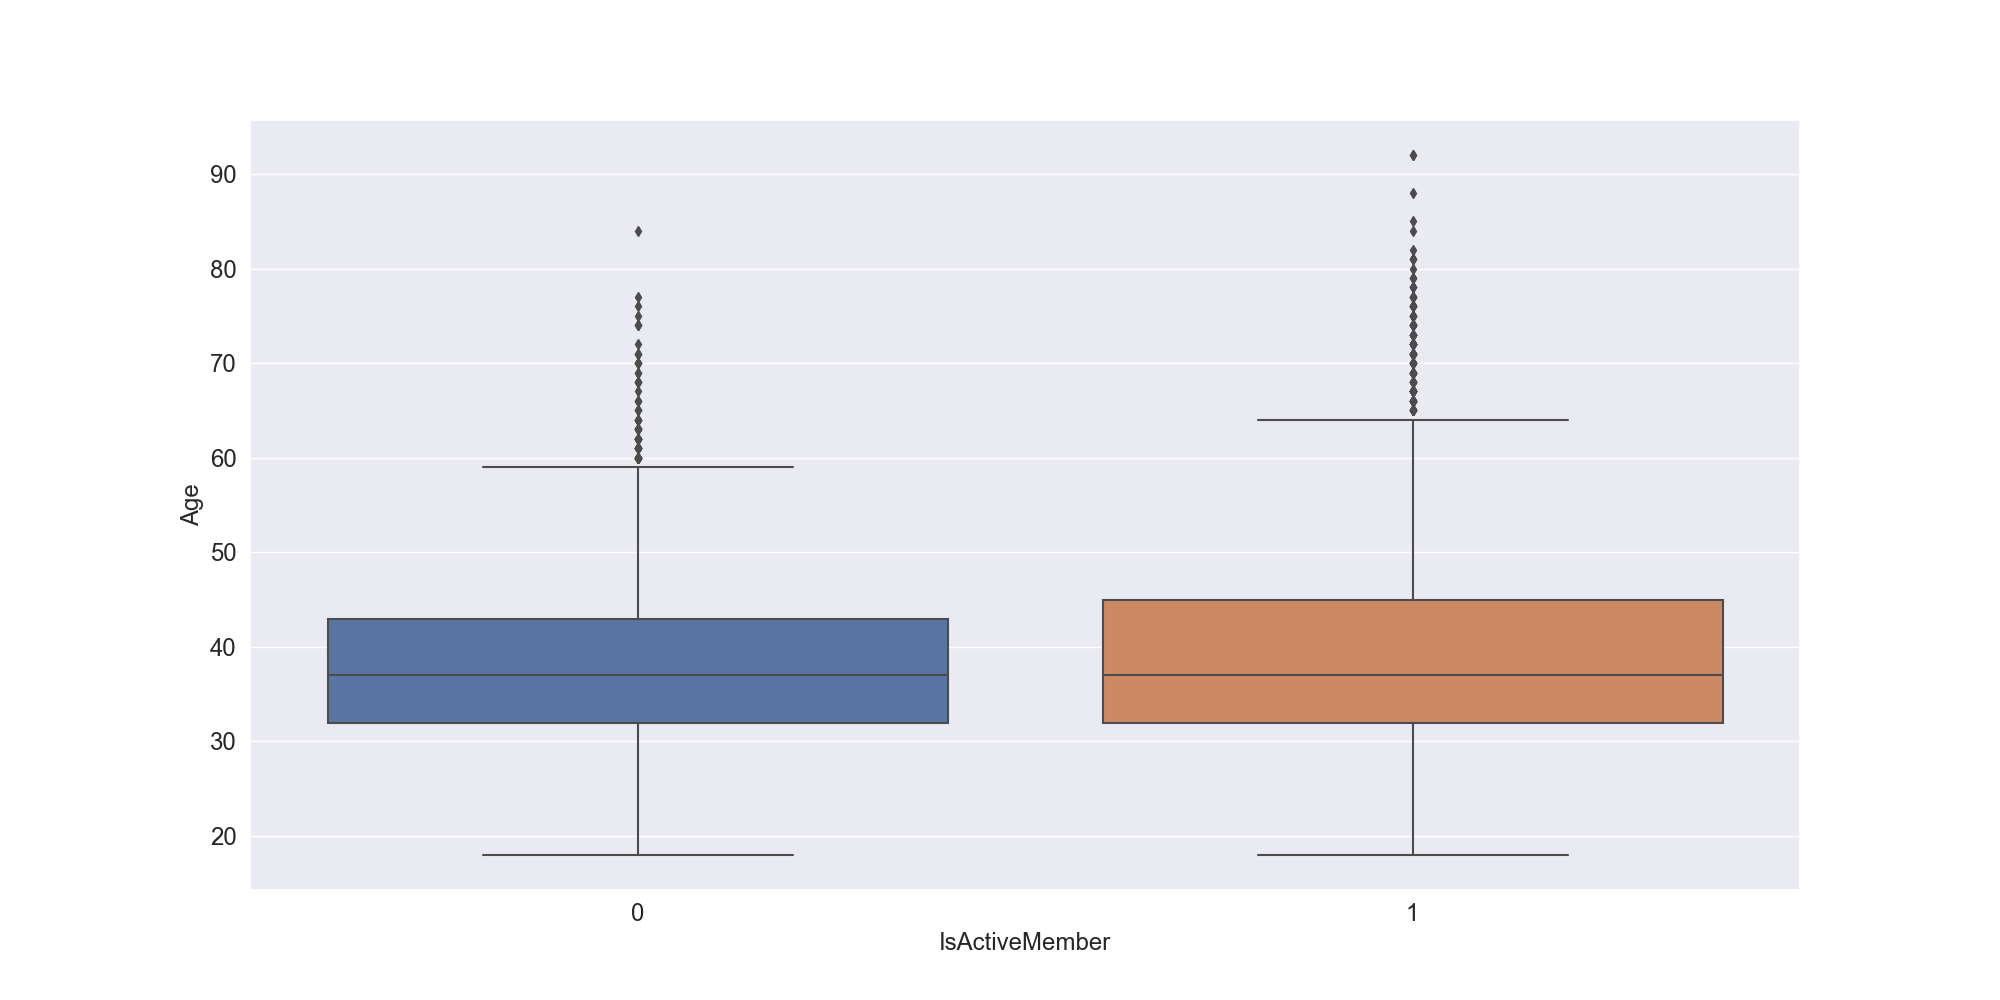
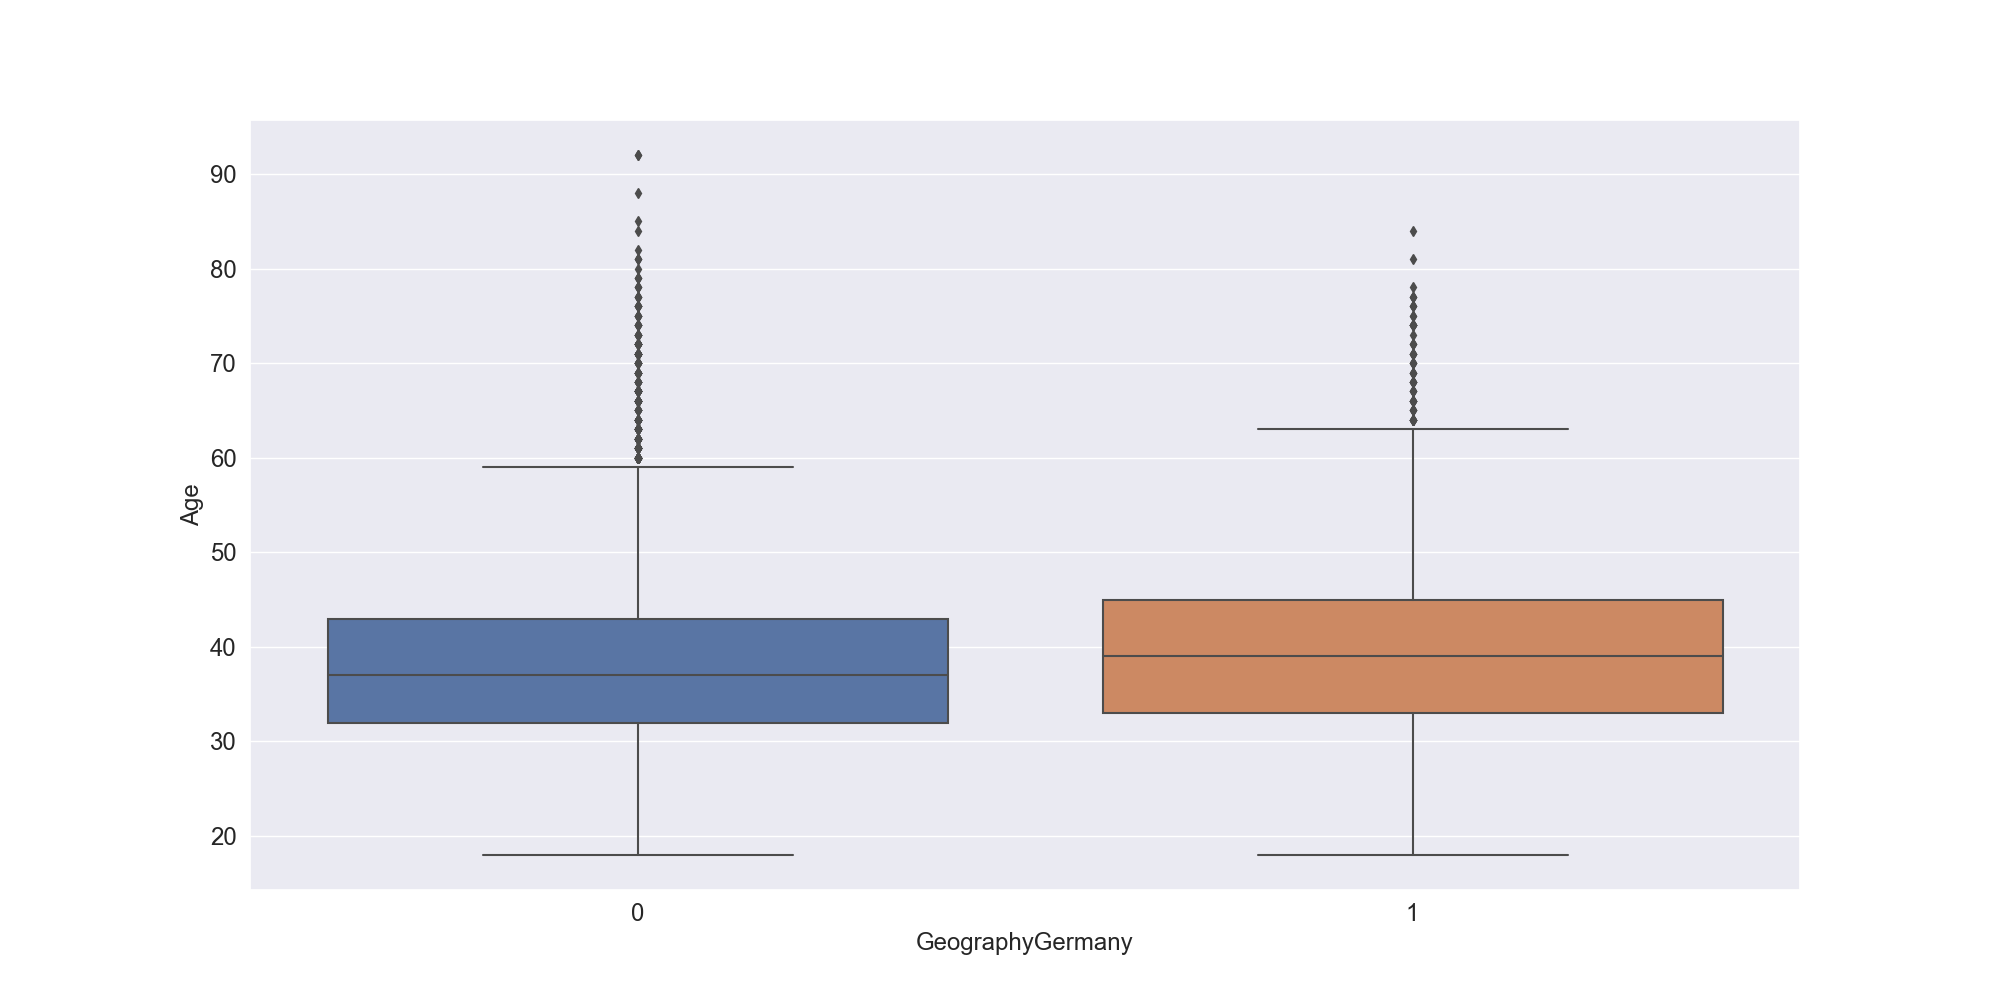
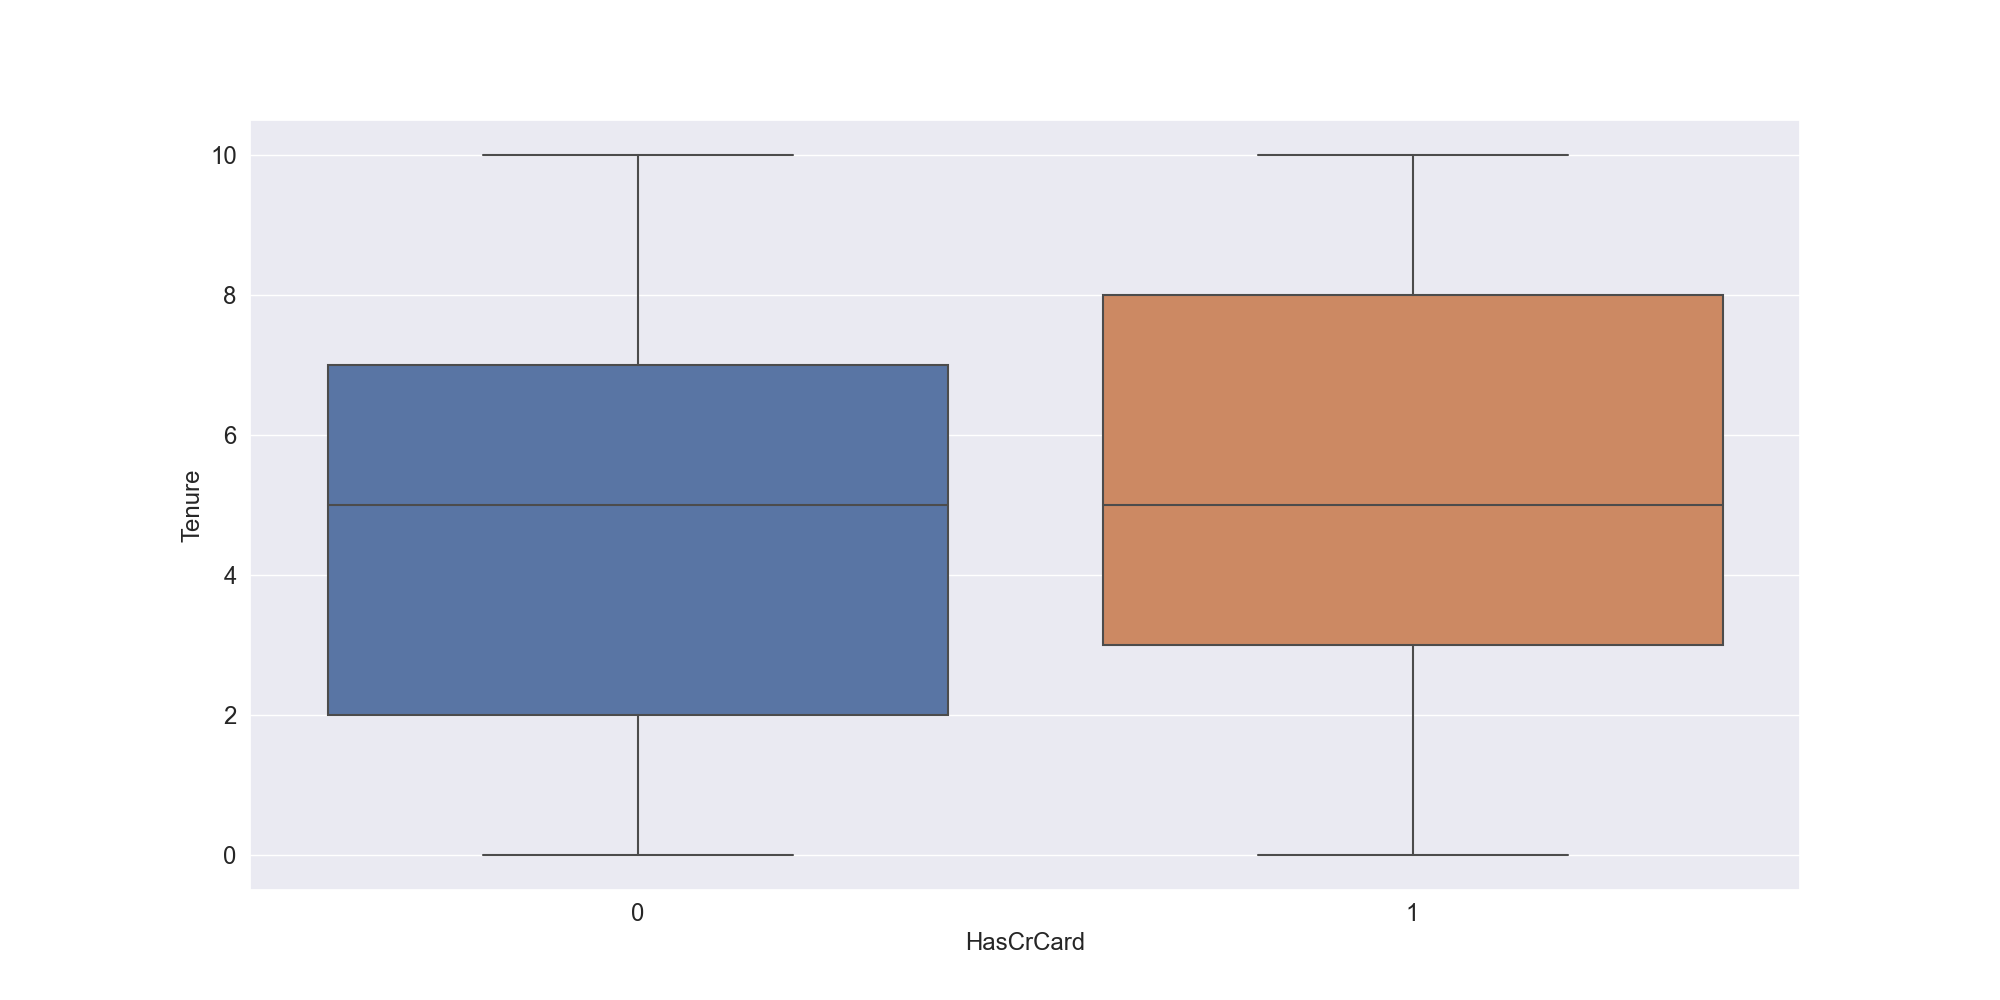
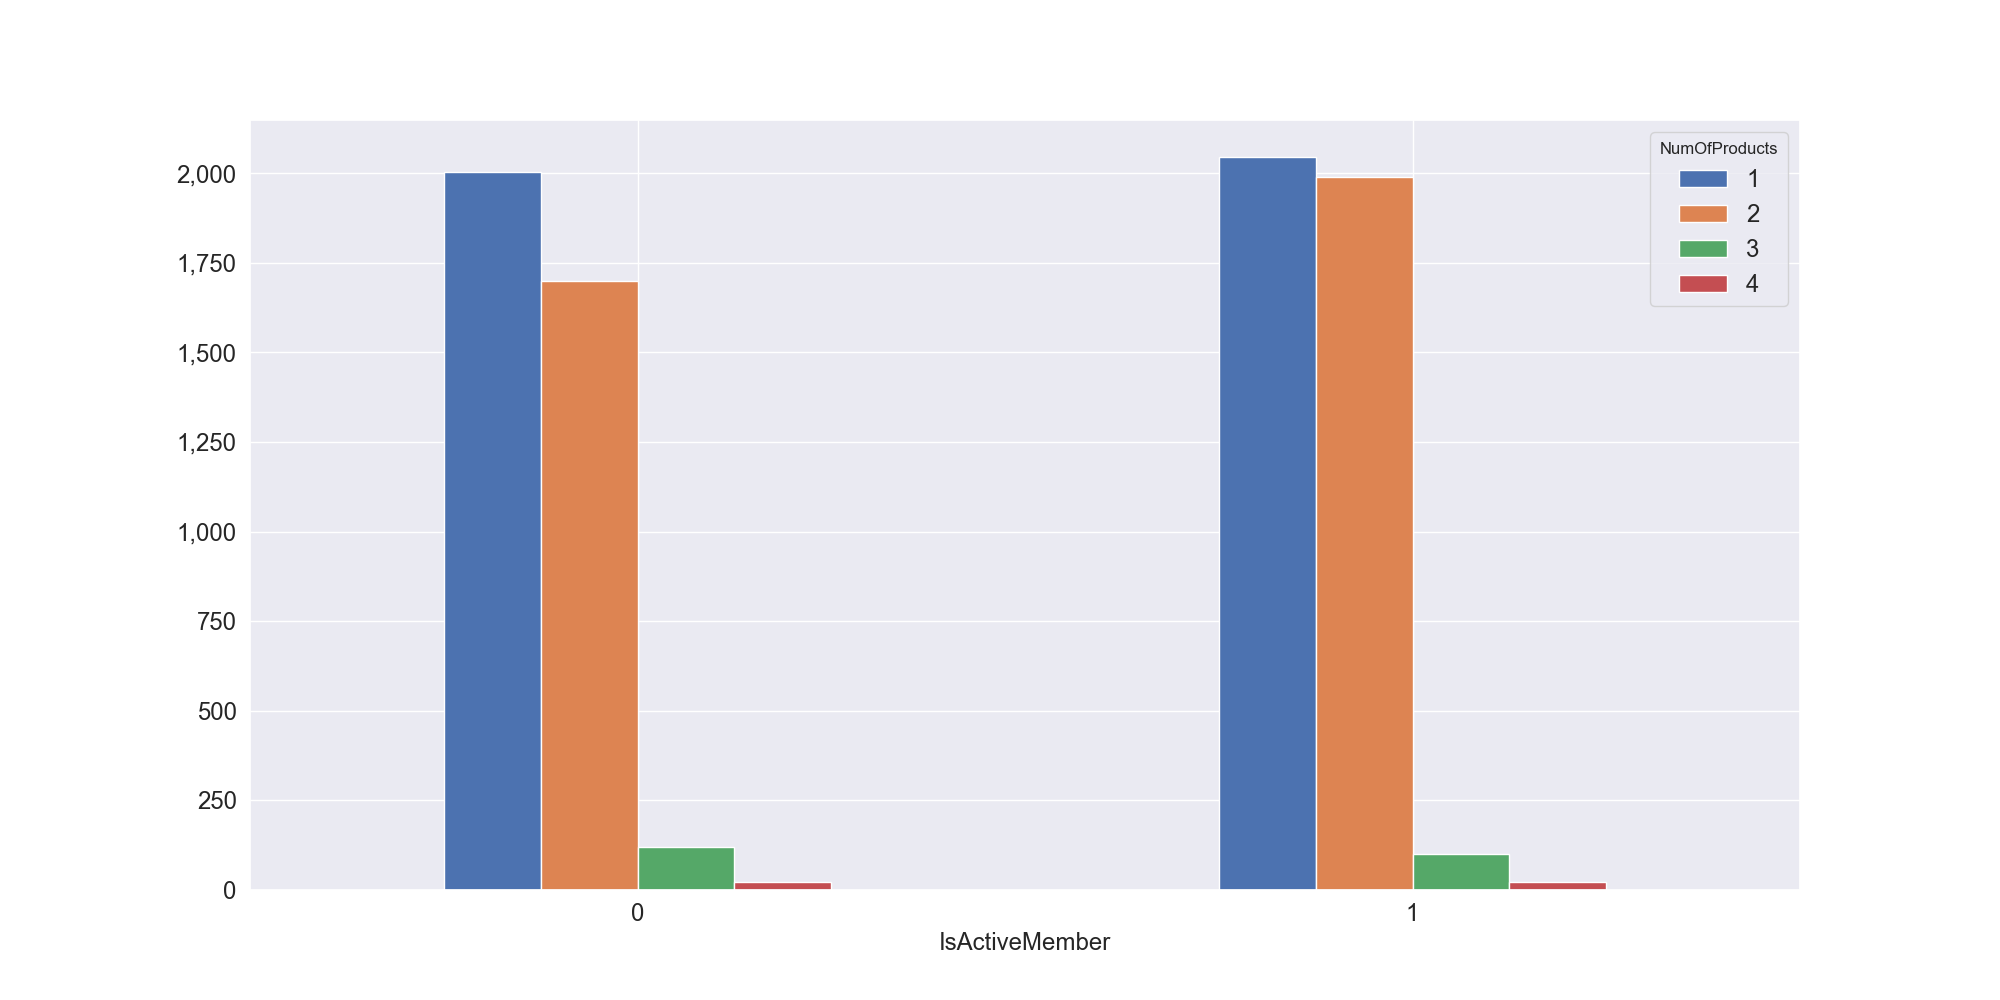
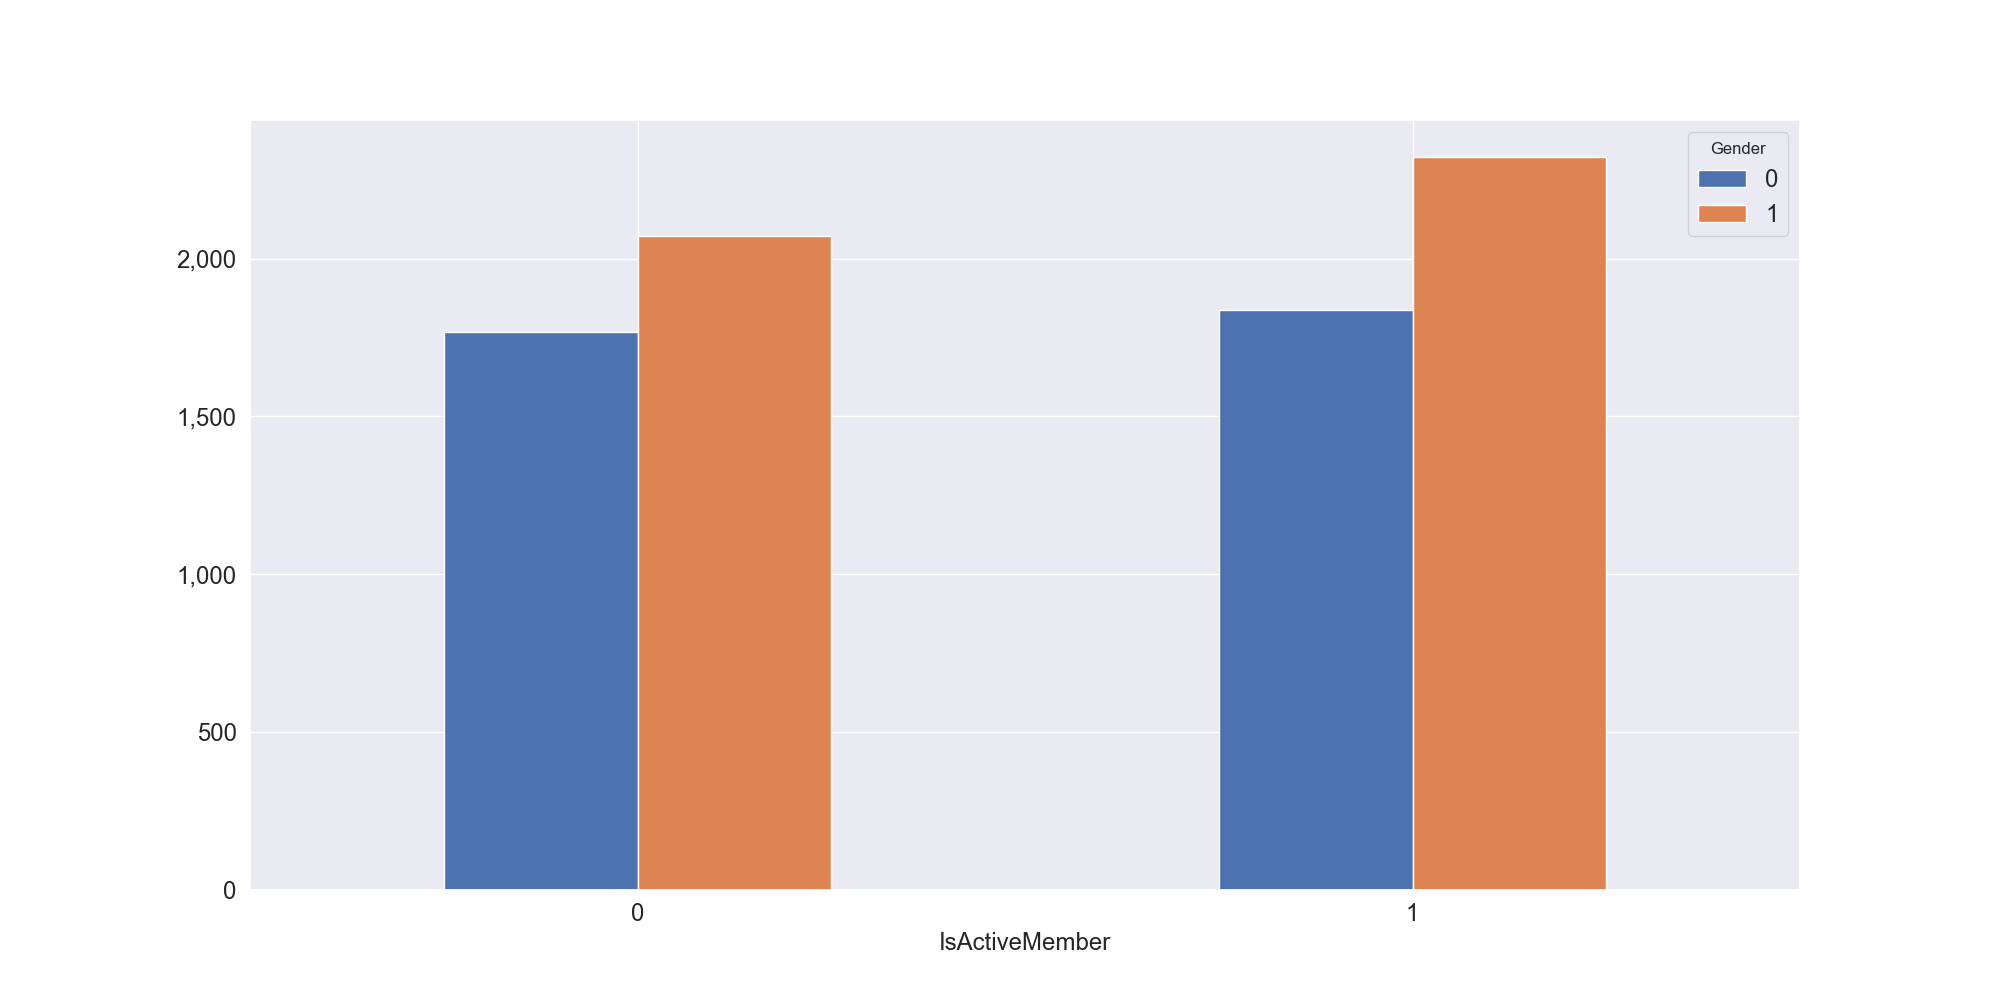
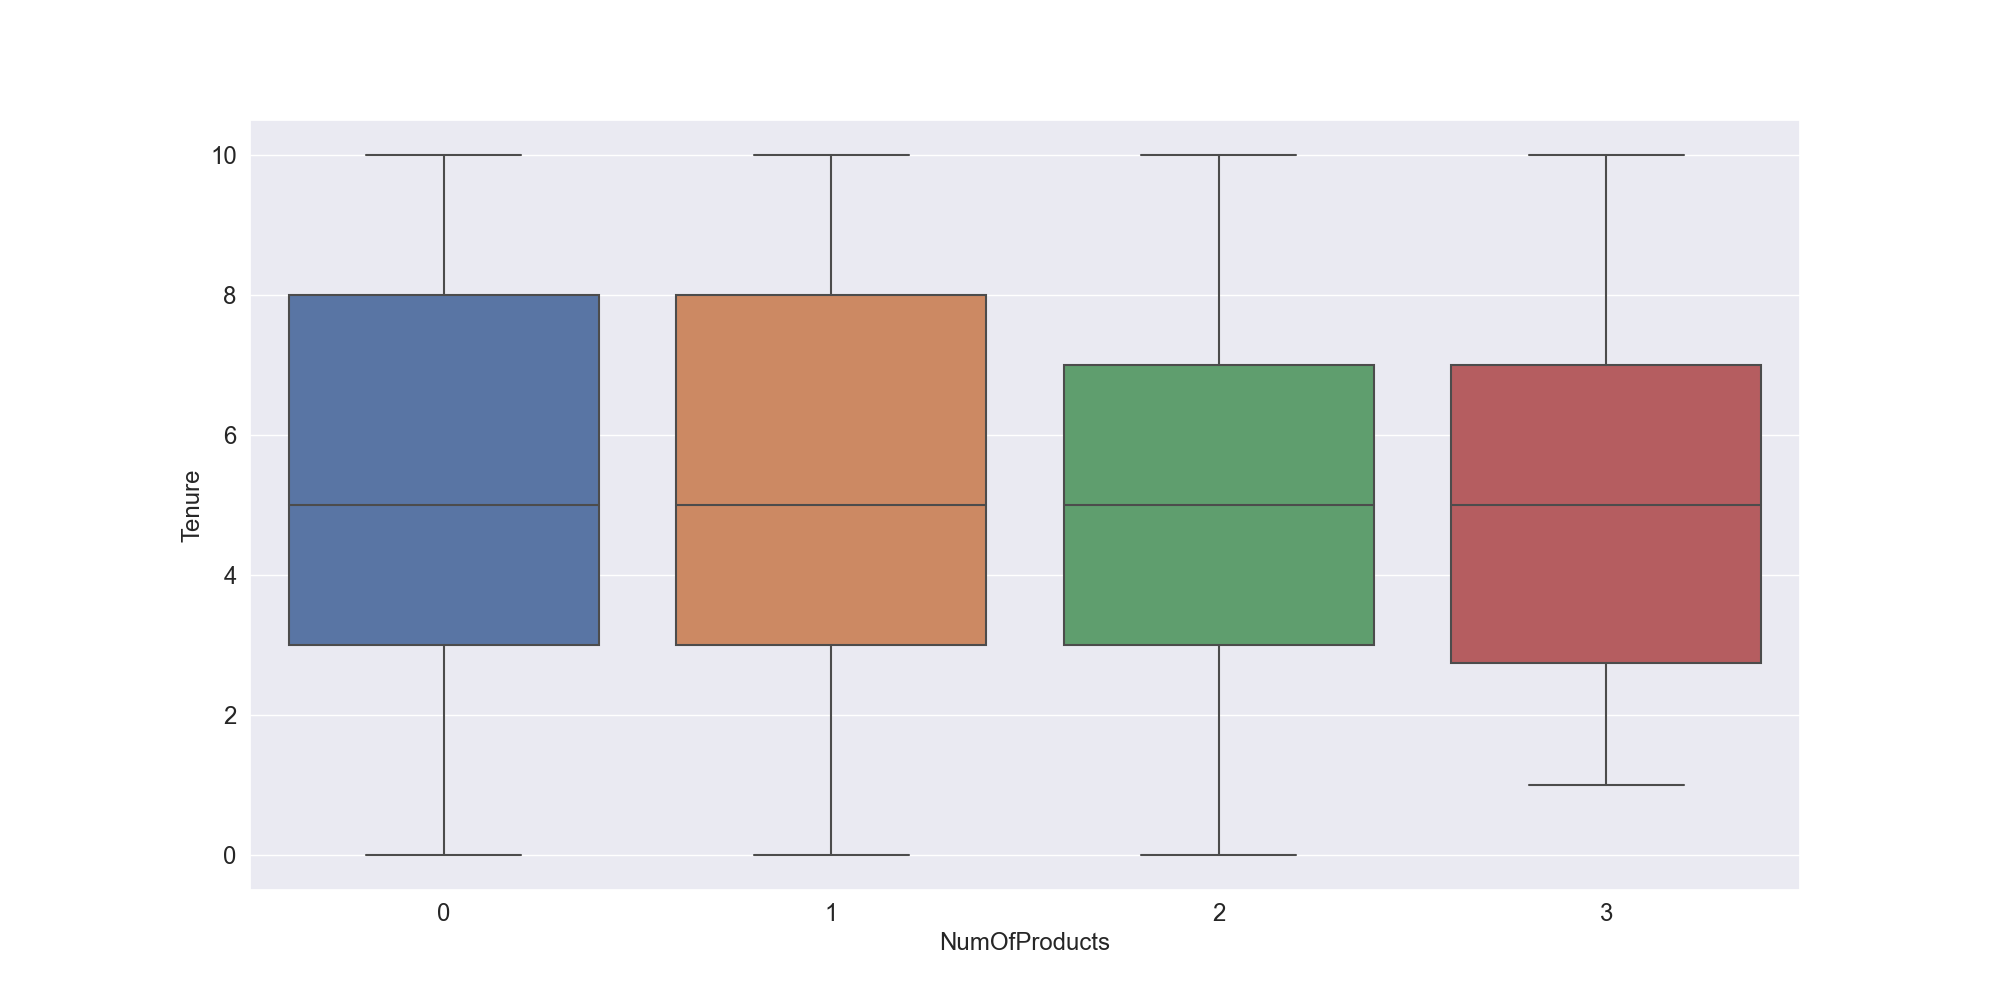
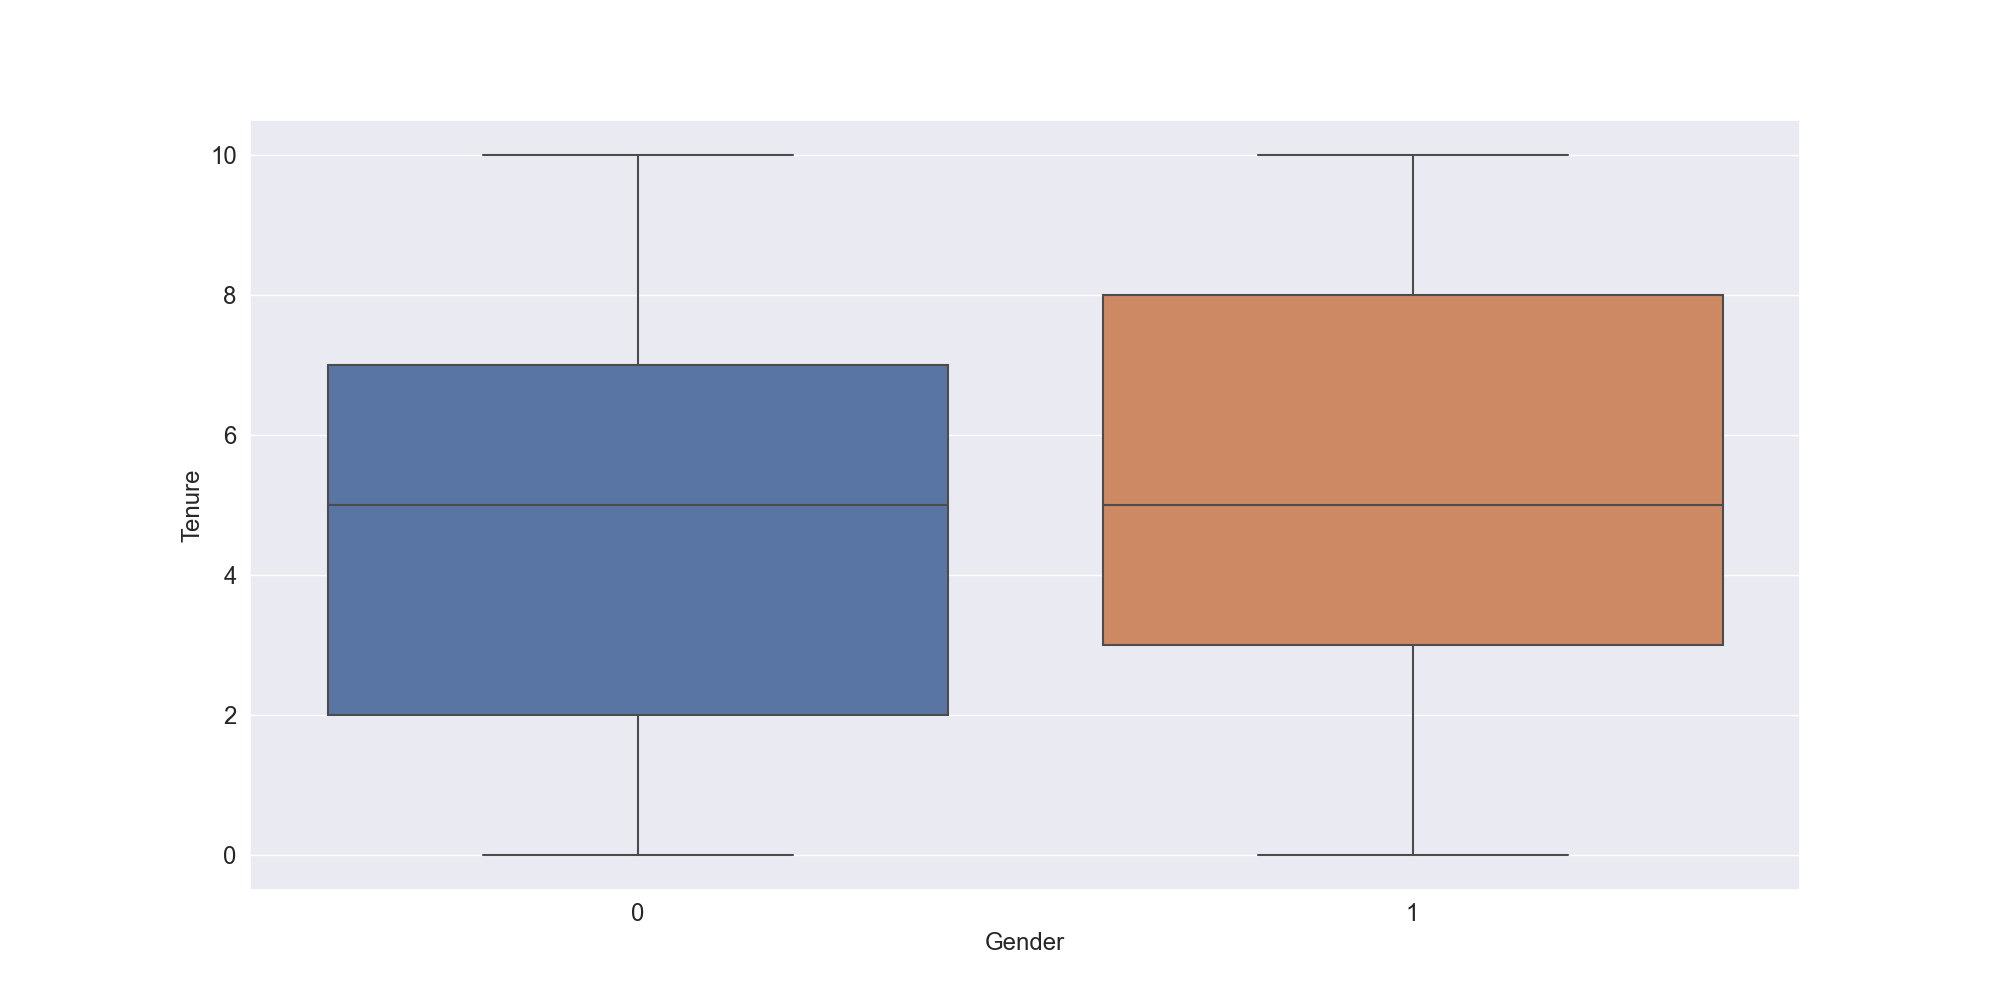
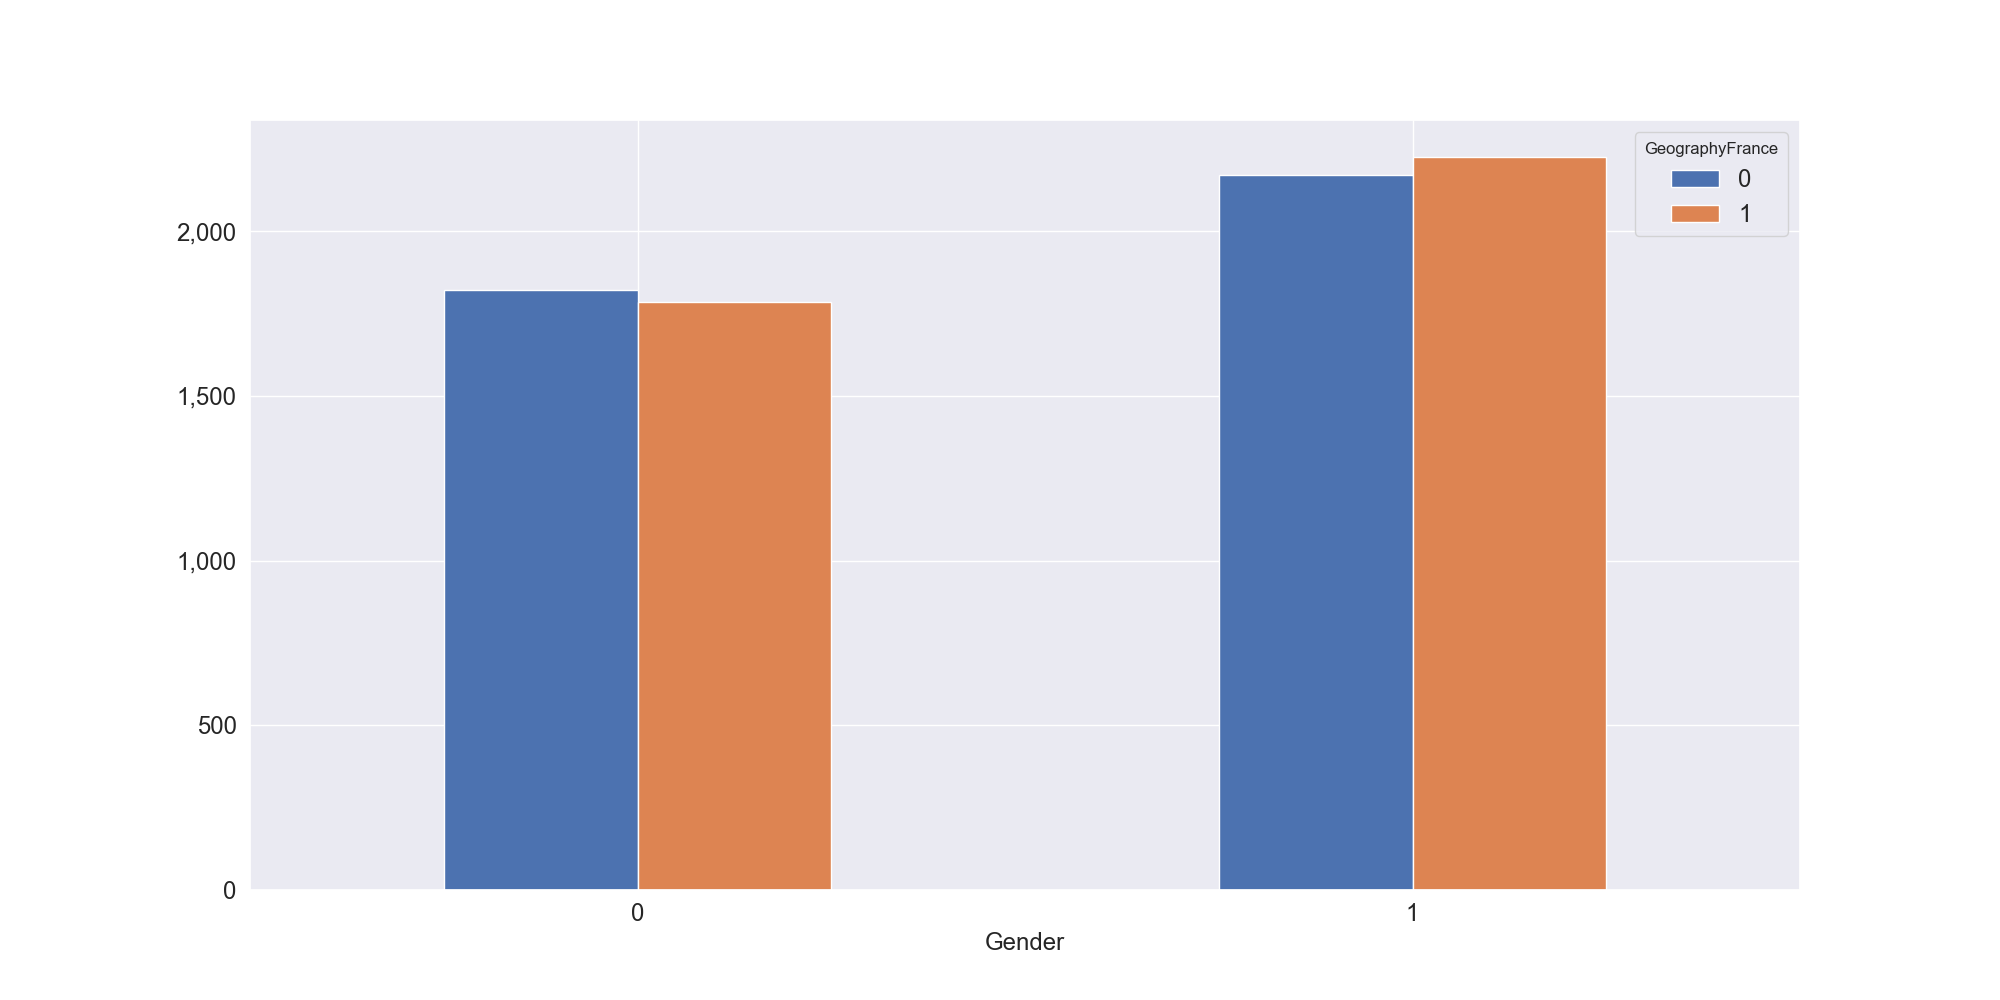
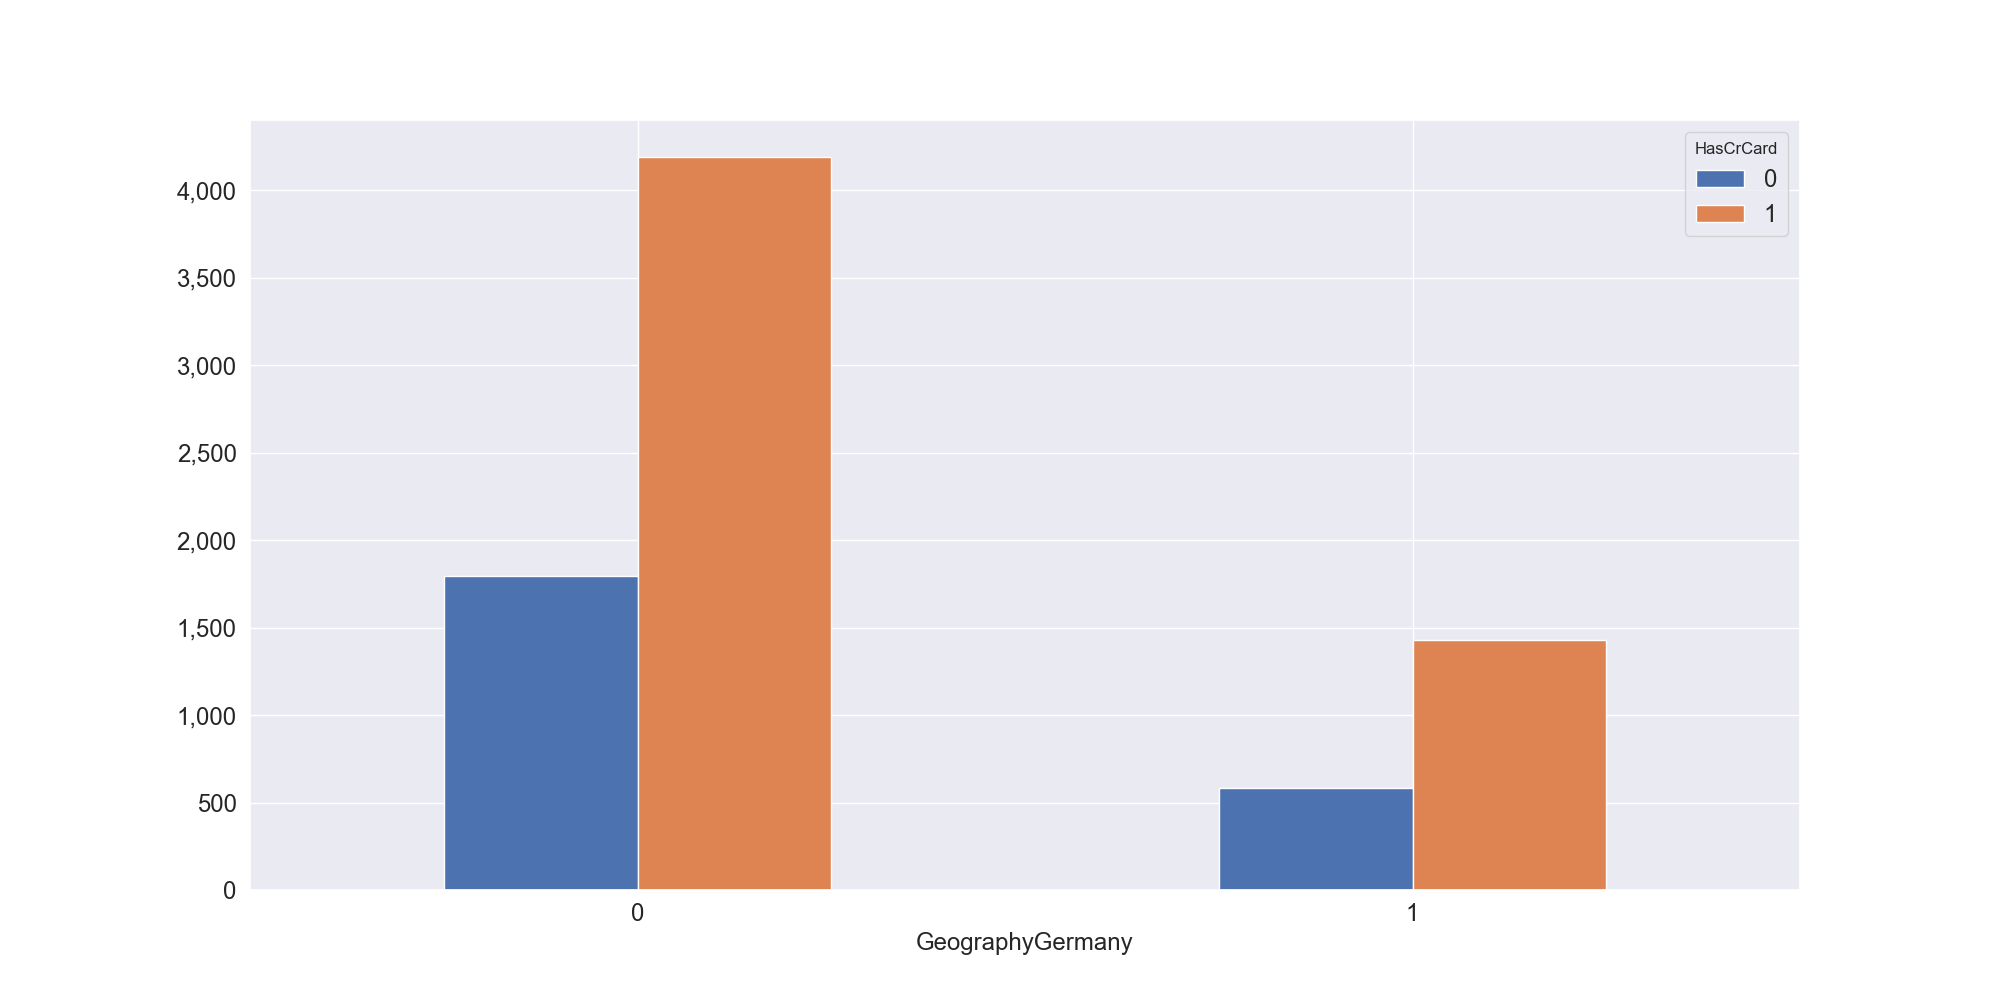
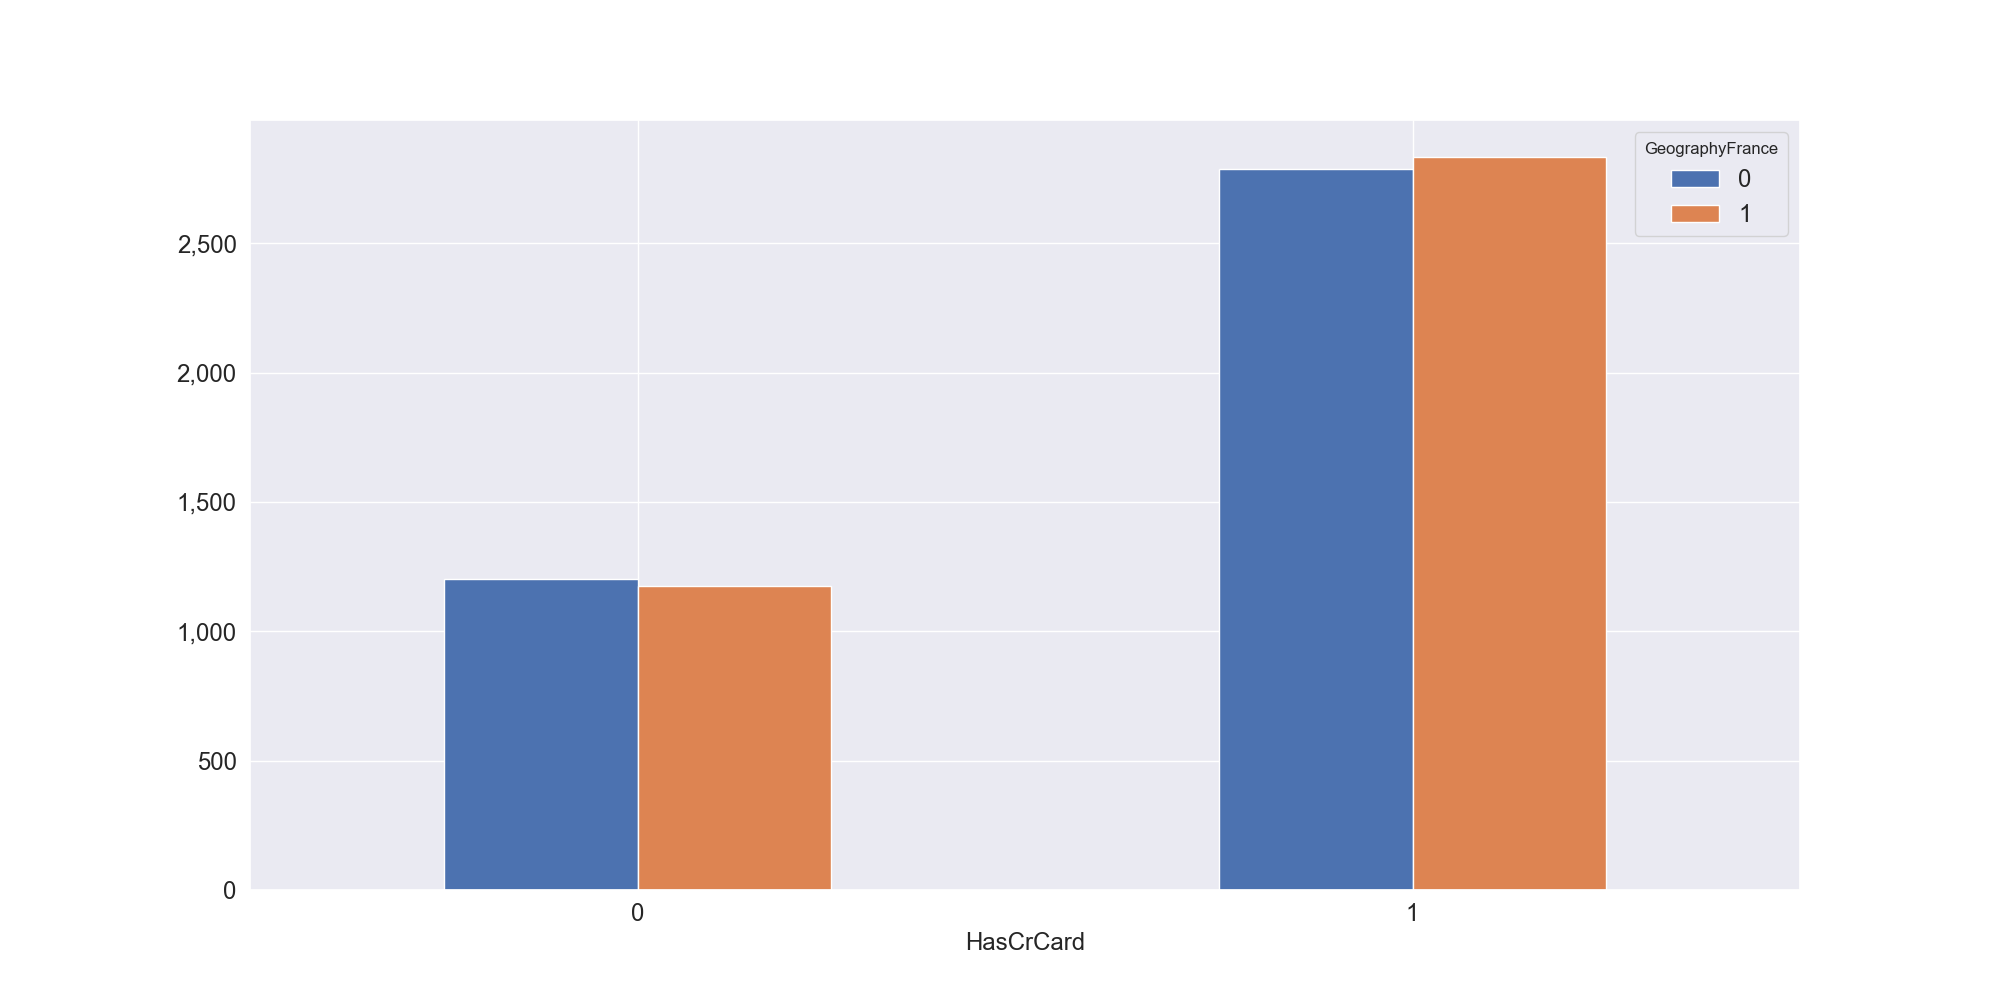
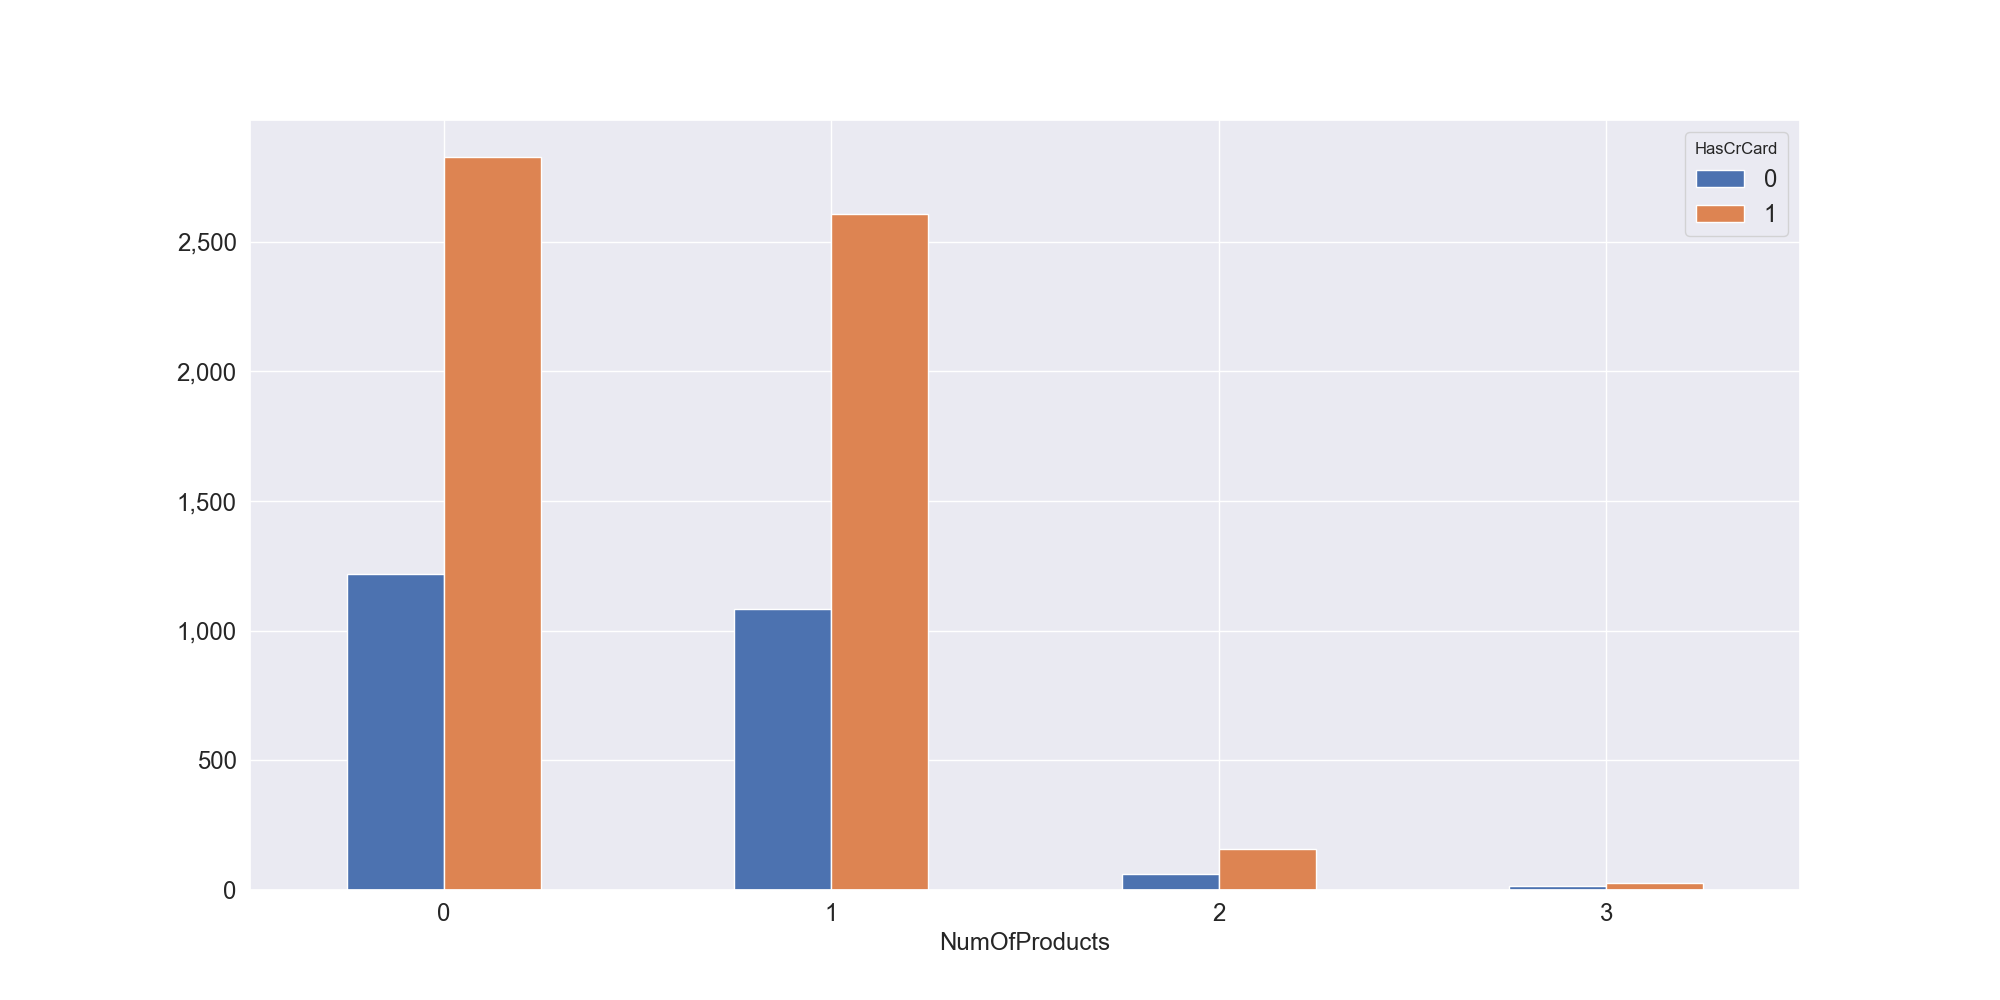
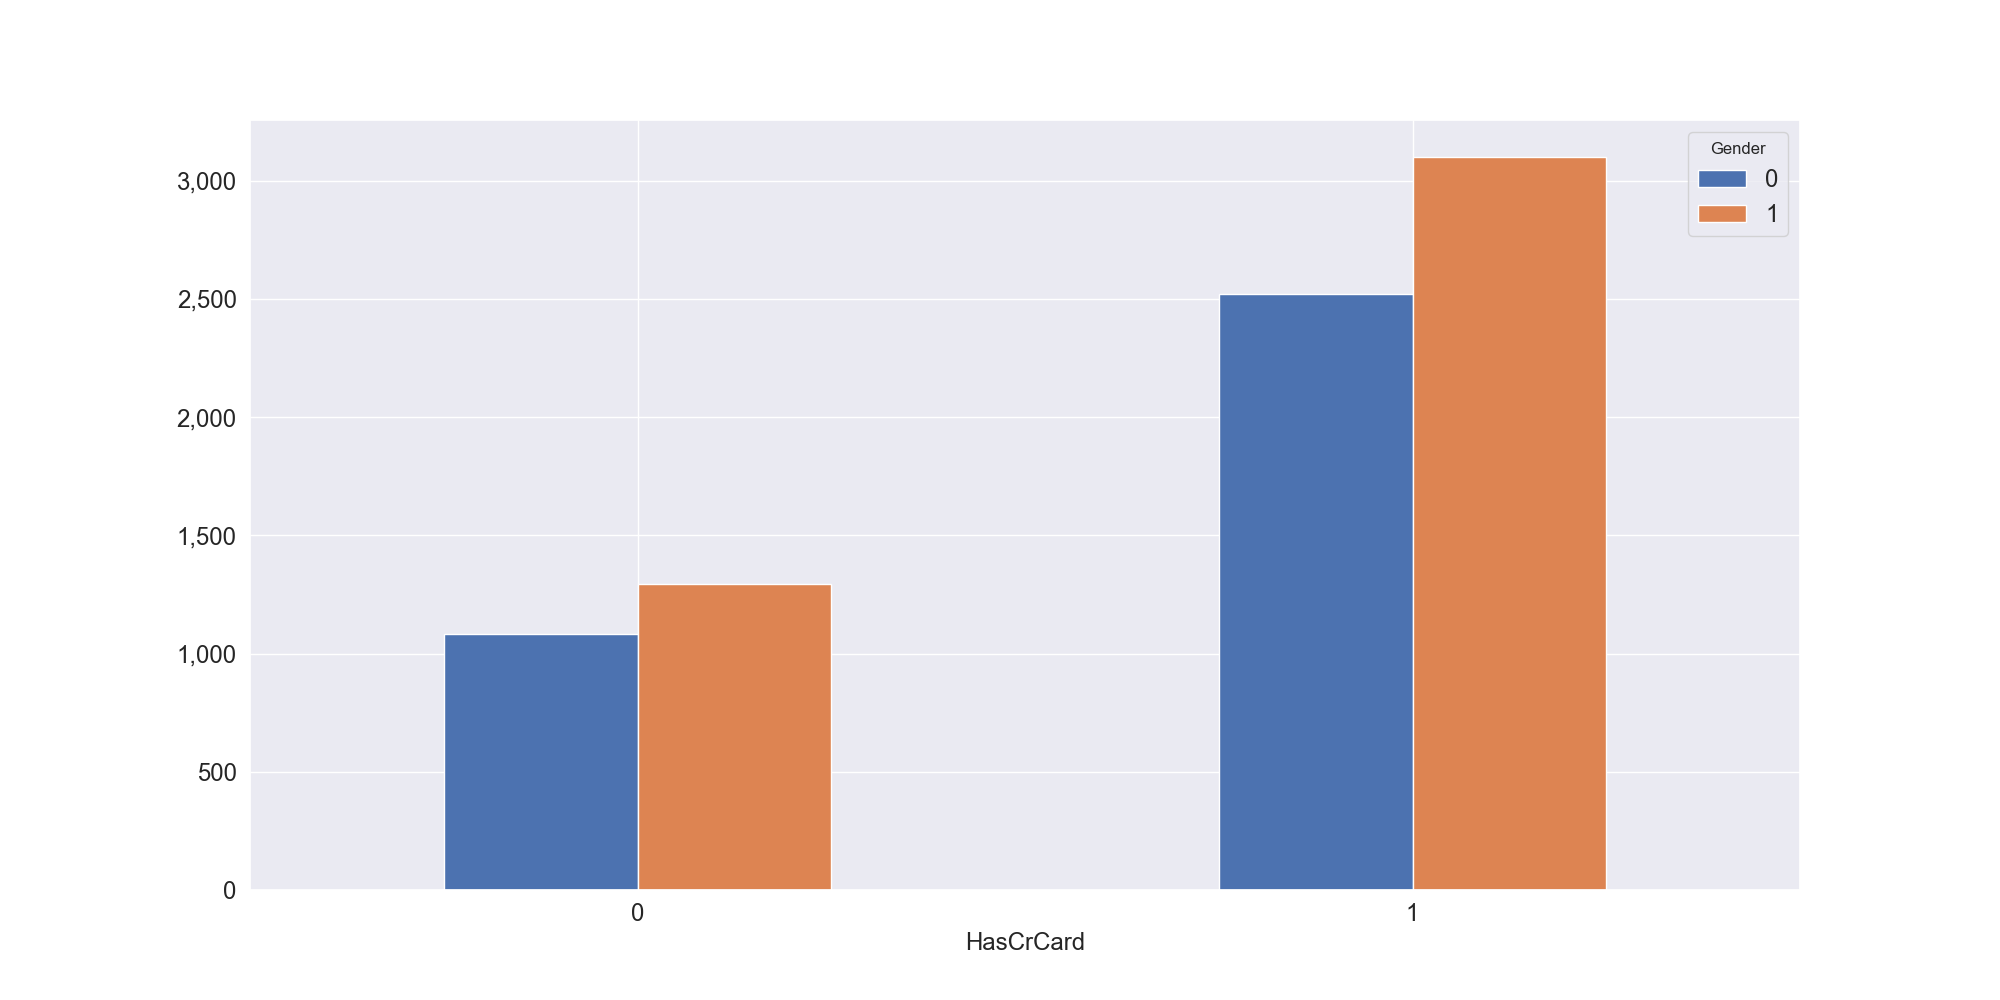
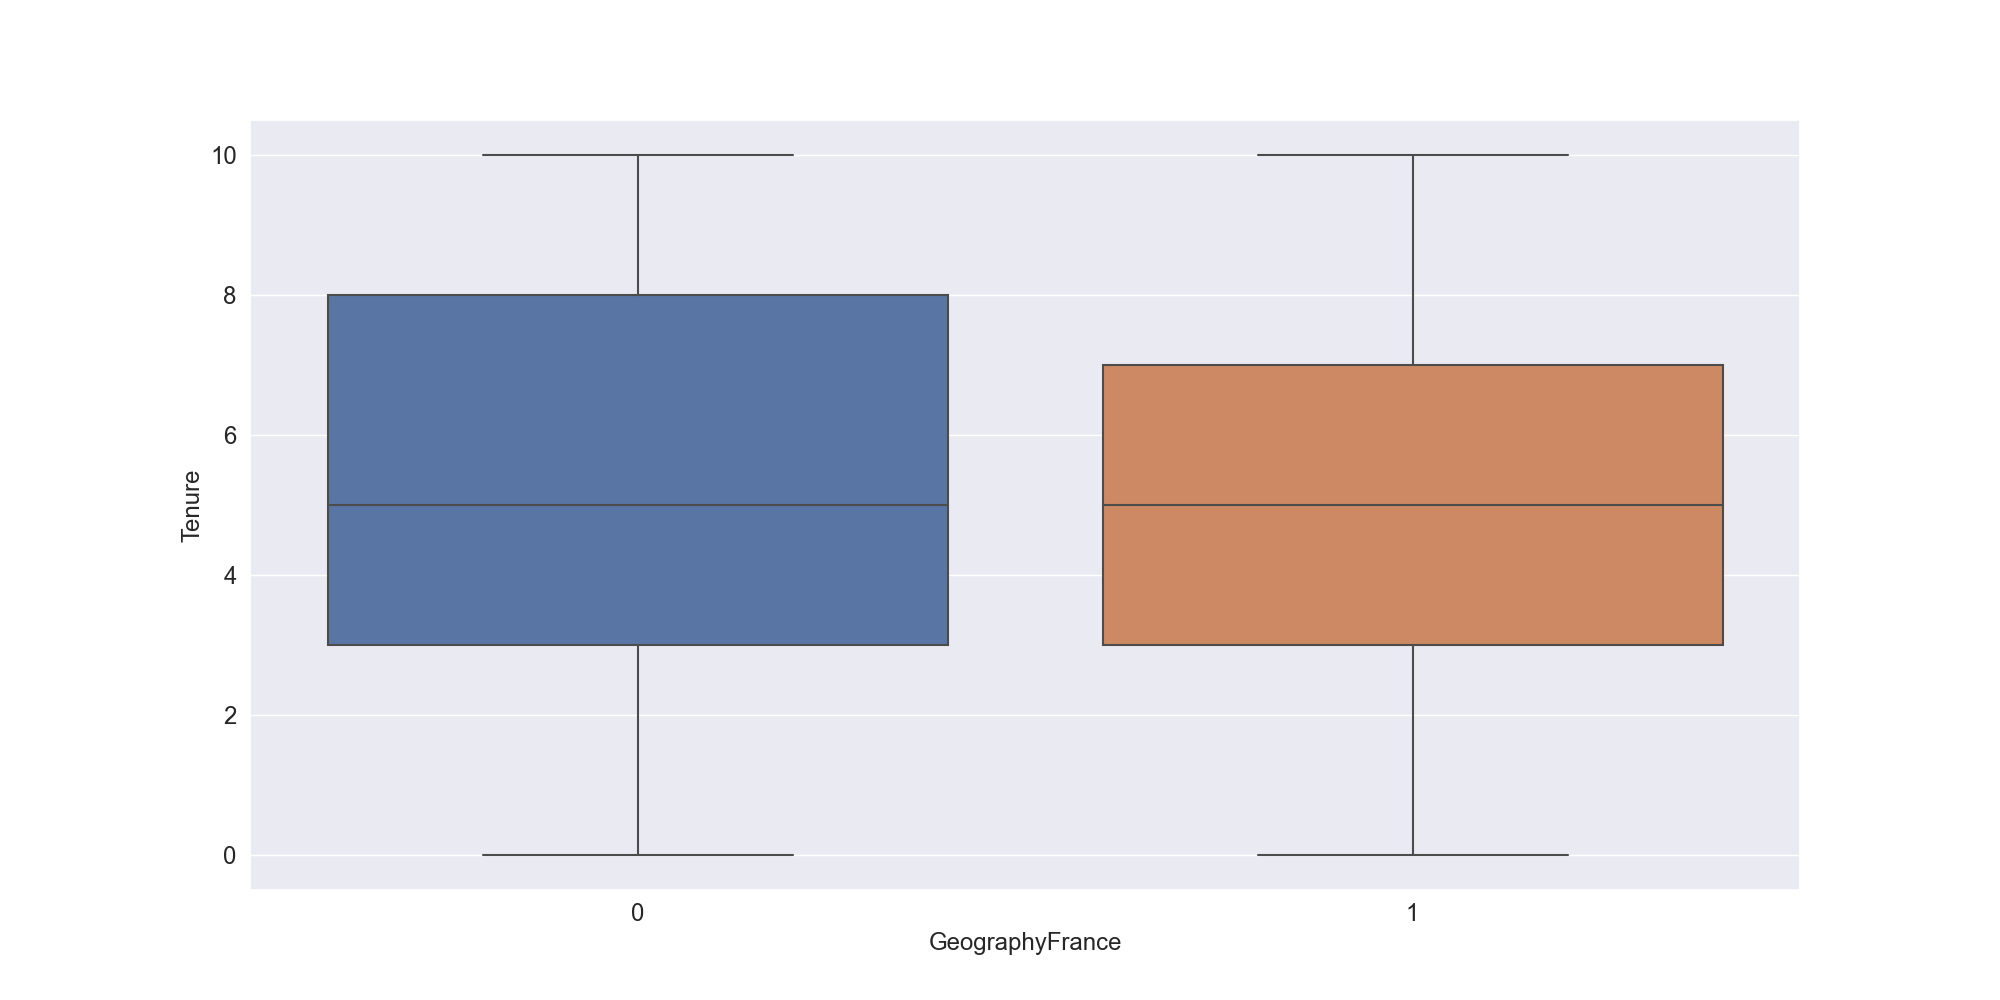

In [5]:
# run dataset tests on df_train and df_test combined
vm_dataset_combined = vm.init_dataset(
    dataset=pd.concat([df_train, df_test]),
    type="generic",
    target_column="Exited",
)
vm.run_test_plan("tabular_dataset", dataset=vm_dataset_combined)

### Running a model evaluation test plan for our LogisticRegression R model

We will now run a basic model evaluation test plan that is compatible with the R model we will be loading.

In [6]:
## load the model
# assume that the model has been saved to disk as a serialized R object (.rds)
# see the r-customer-churn-model.ipynb notebook for details on how this can be done
# model_type must be passed for R models:
# Currently, LogisticRegression, LinearRegression (glm and lm in R) XGBClassifier and XGBRegressor are supported
vm_model = vm.init_r_model("r_demo/r_log_reg_churn_model.rds", model_type="LogisticRegression")


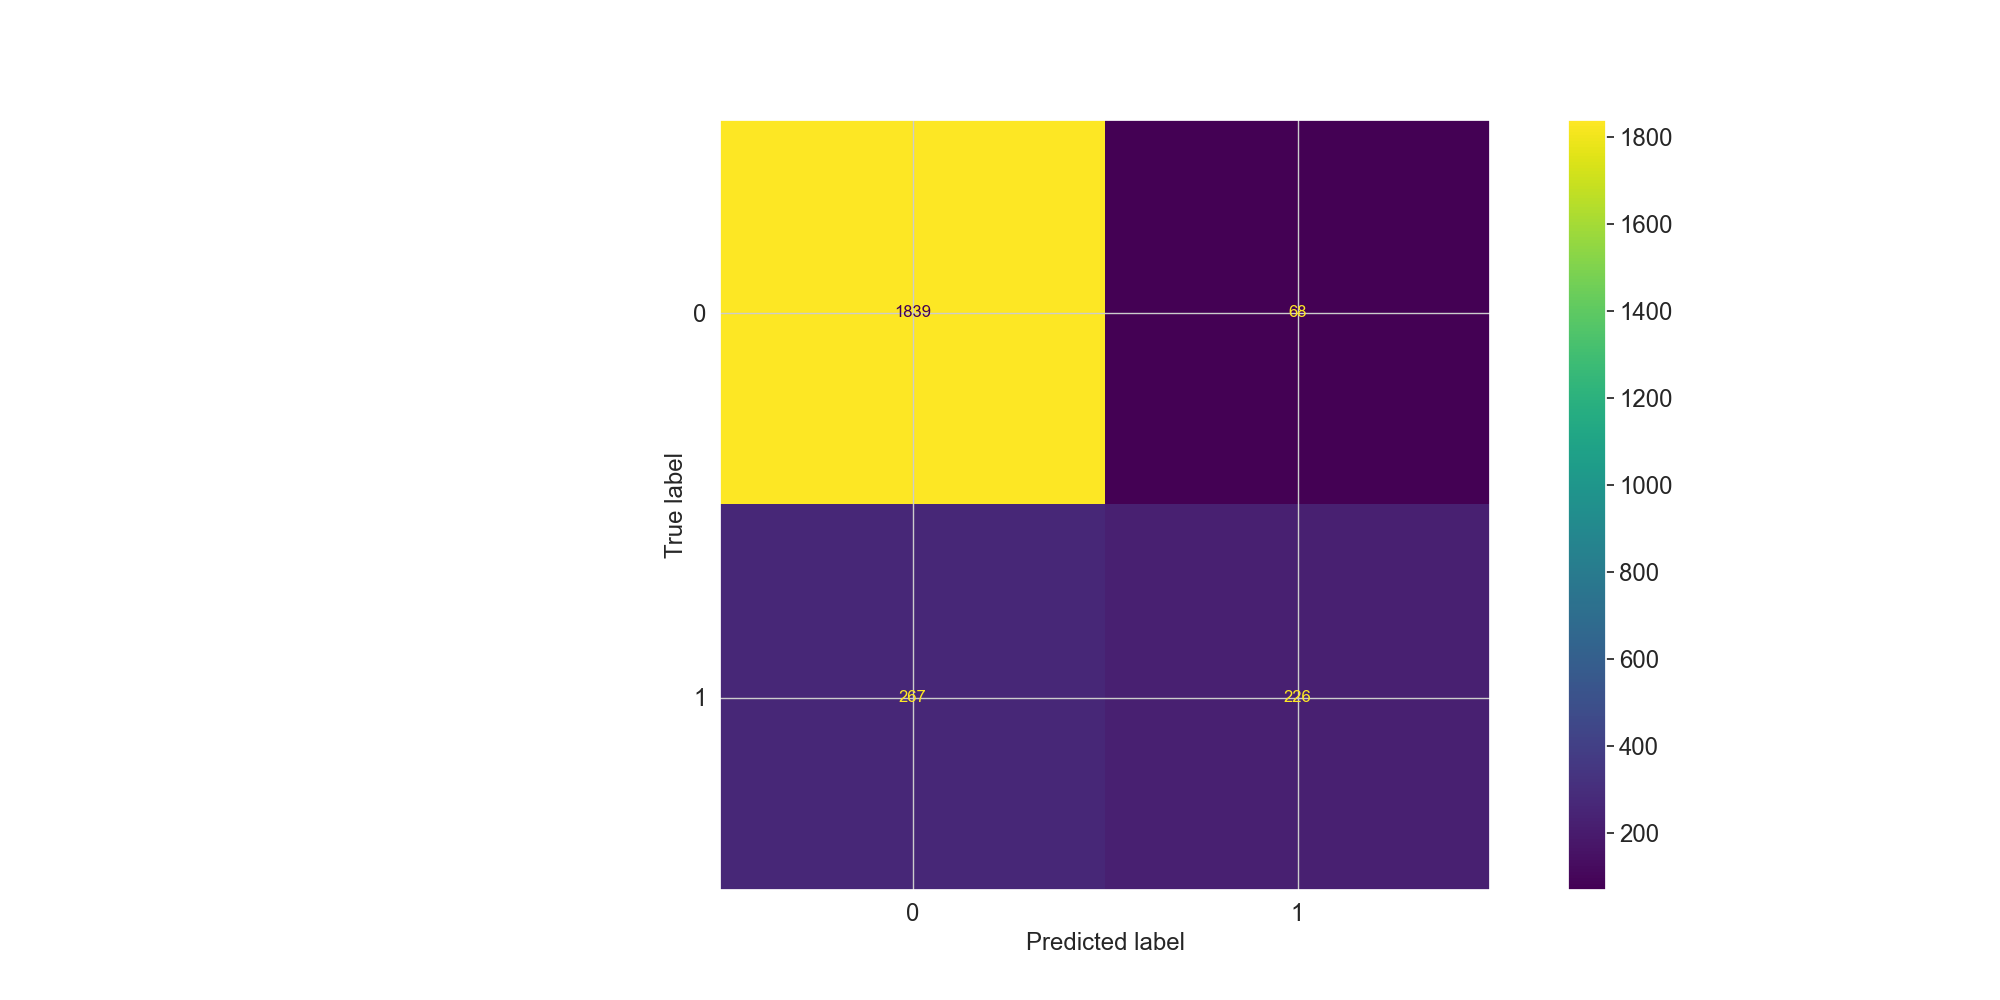
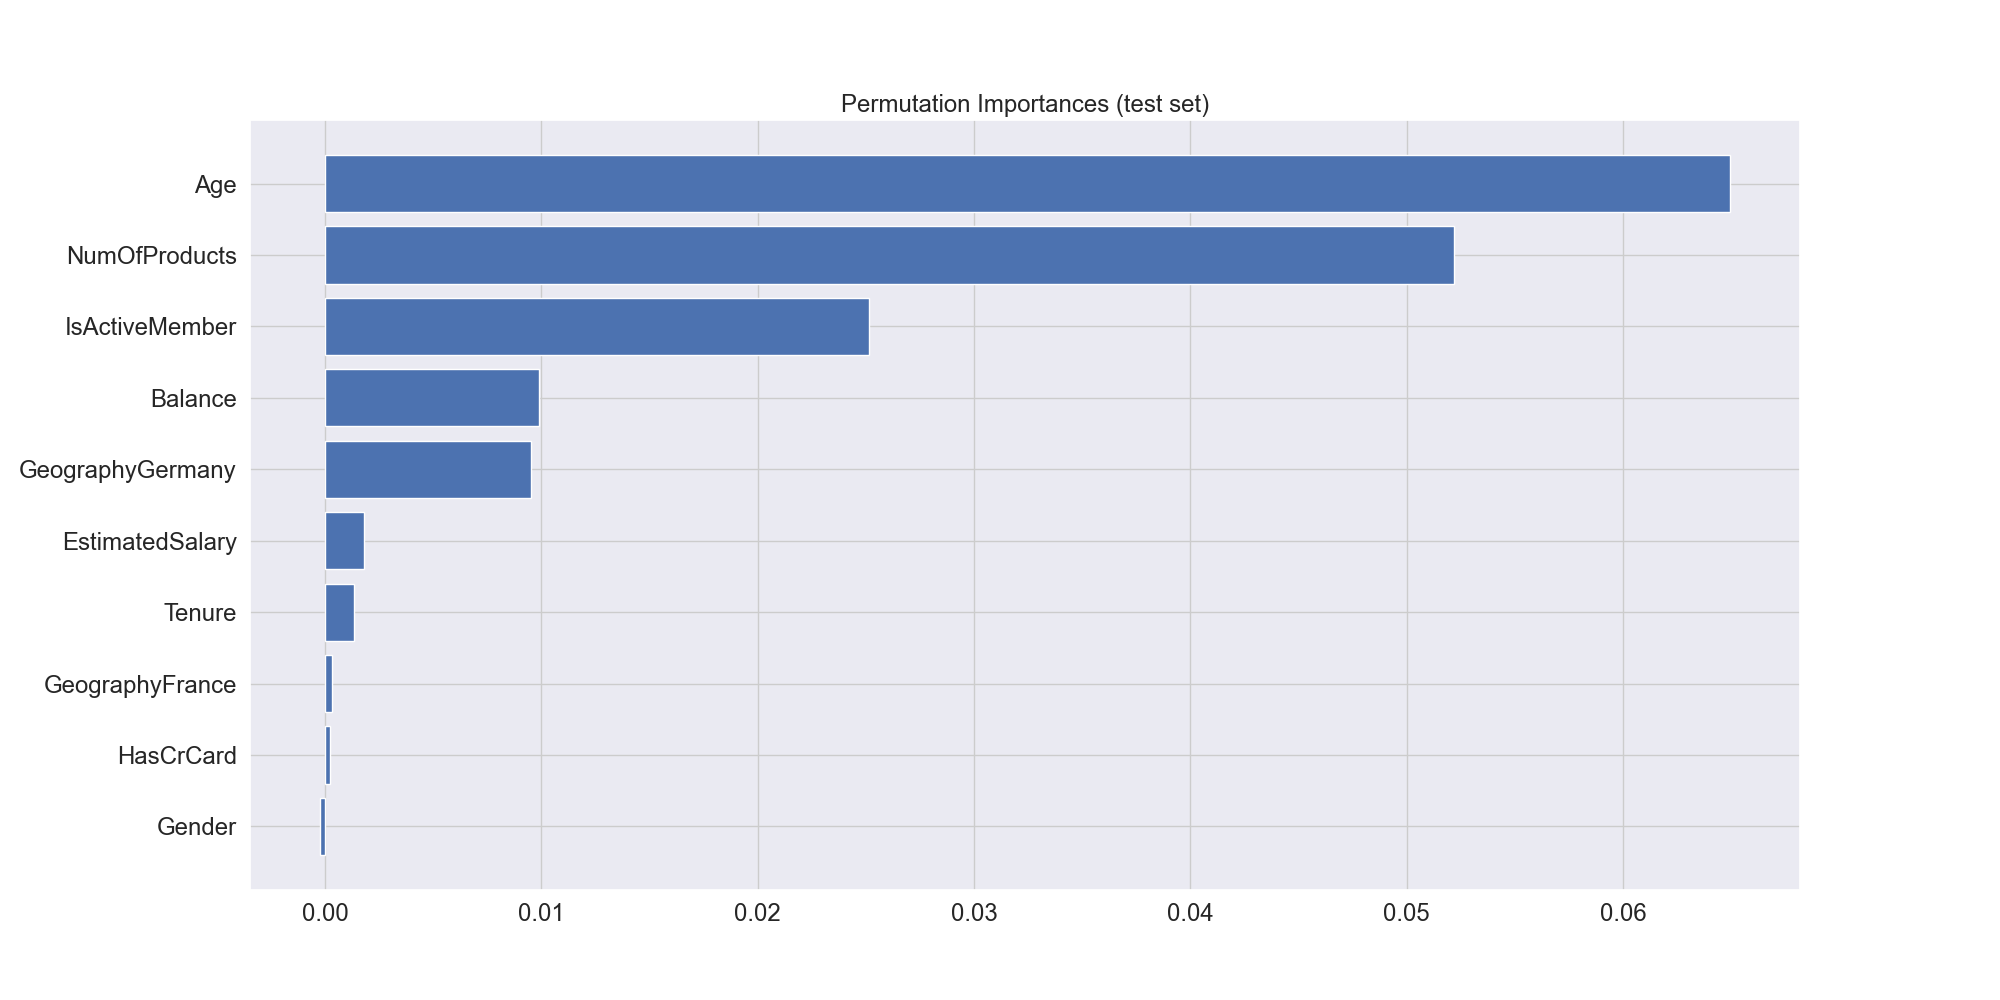
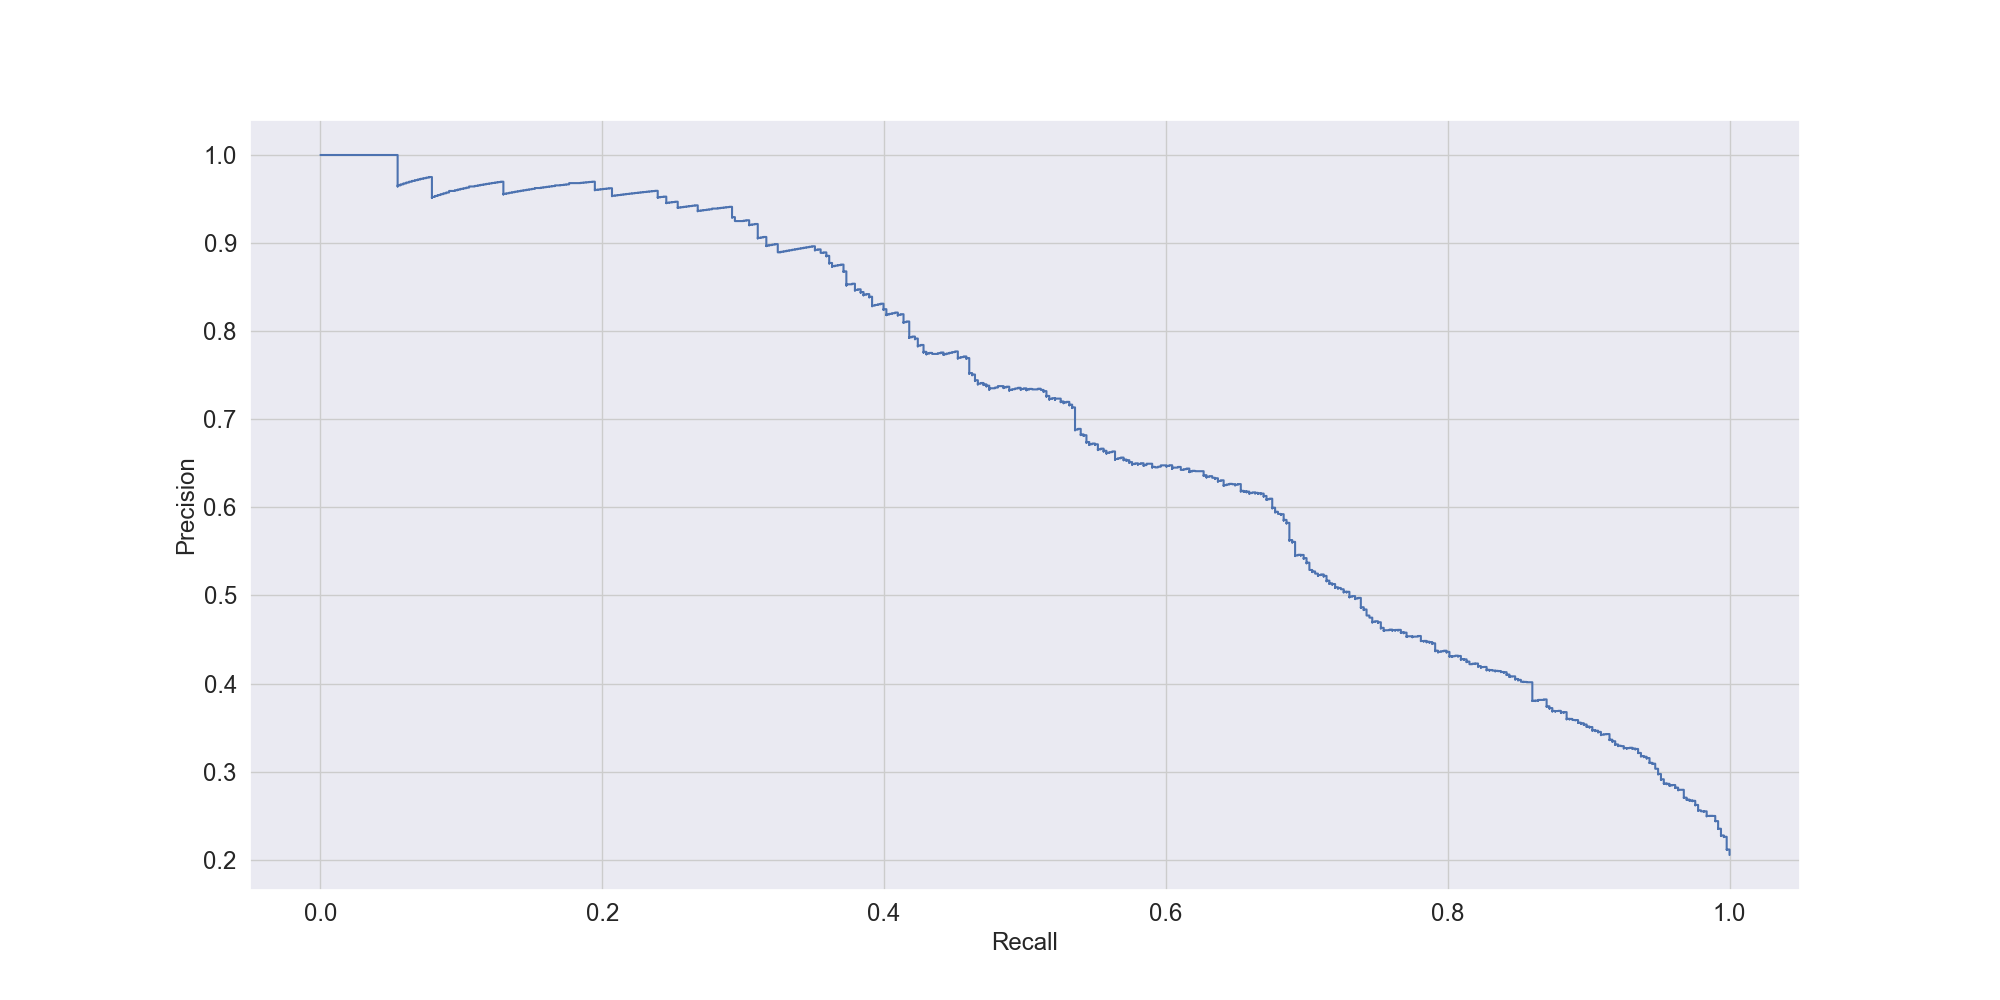
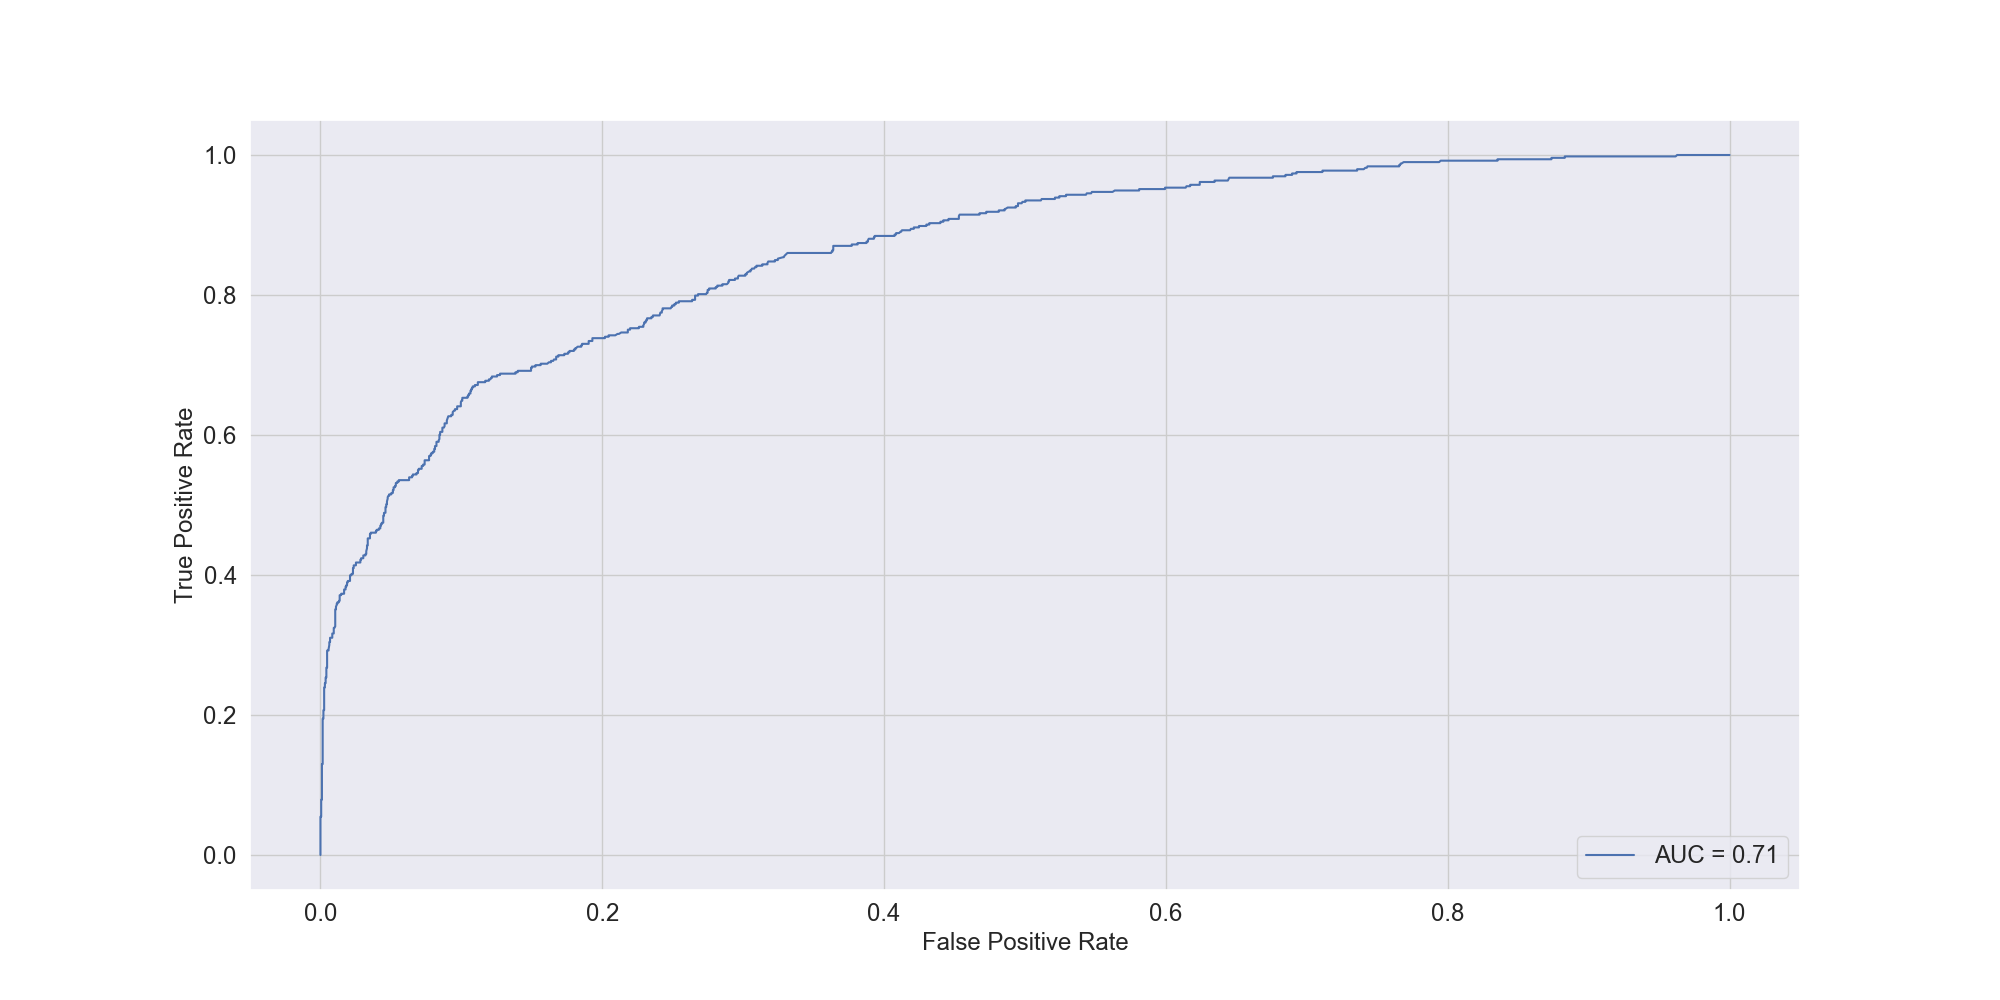
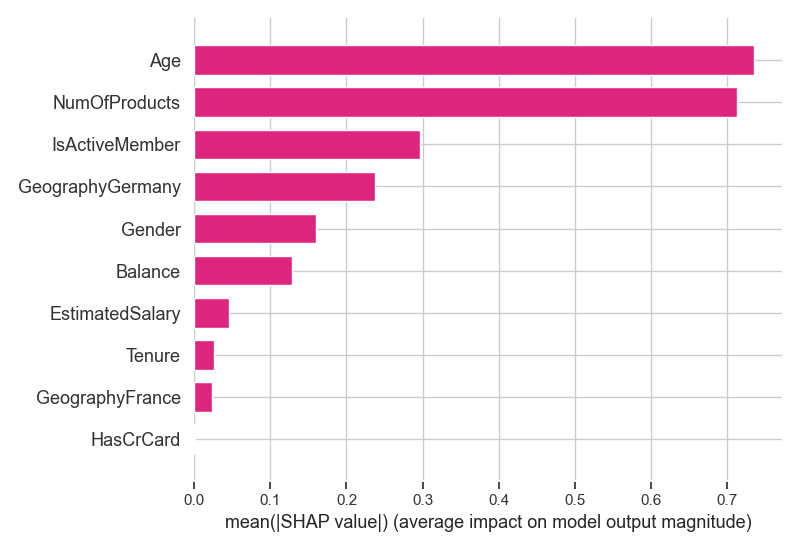
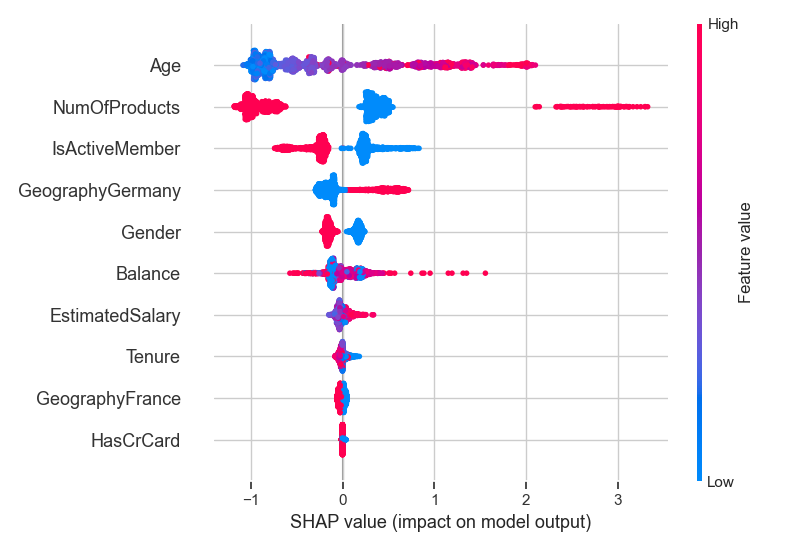

In [10]:
vm.run_test_plan("sklearn_classifier", model=vm_model, train_ds=vm_train_ds, test_ds=vm_test_ds)

### Running a model evaluation test plan for our XGBoost R model

We will now run a basic model evaluation test plan that is compatible with the R model we will be loading.

In [8]:
## load the model
# assume that the model has been saved to disk as an XGBoost .bin or .json model
# see the r-customer-churn-model.ipynb notebook for details on how this can be done
vm_model = vm.init_r_model("r_demo/r_xgb_churn_model.json", model_type="XGBClassifier")


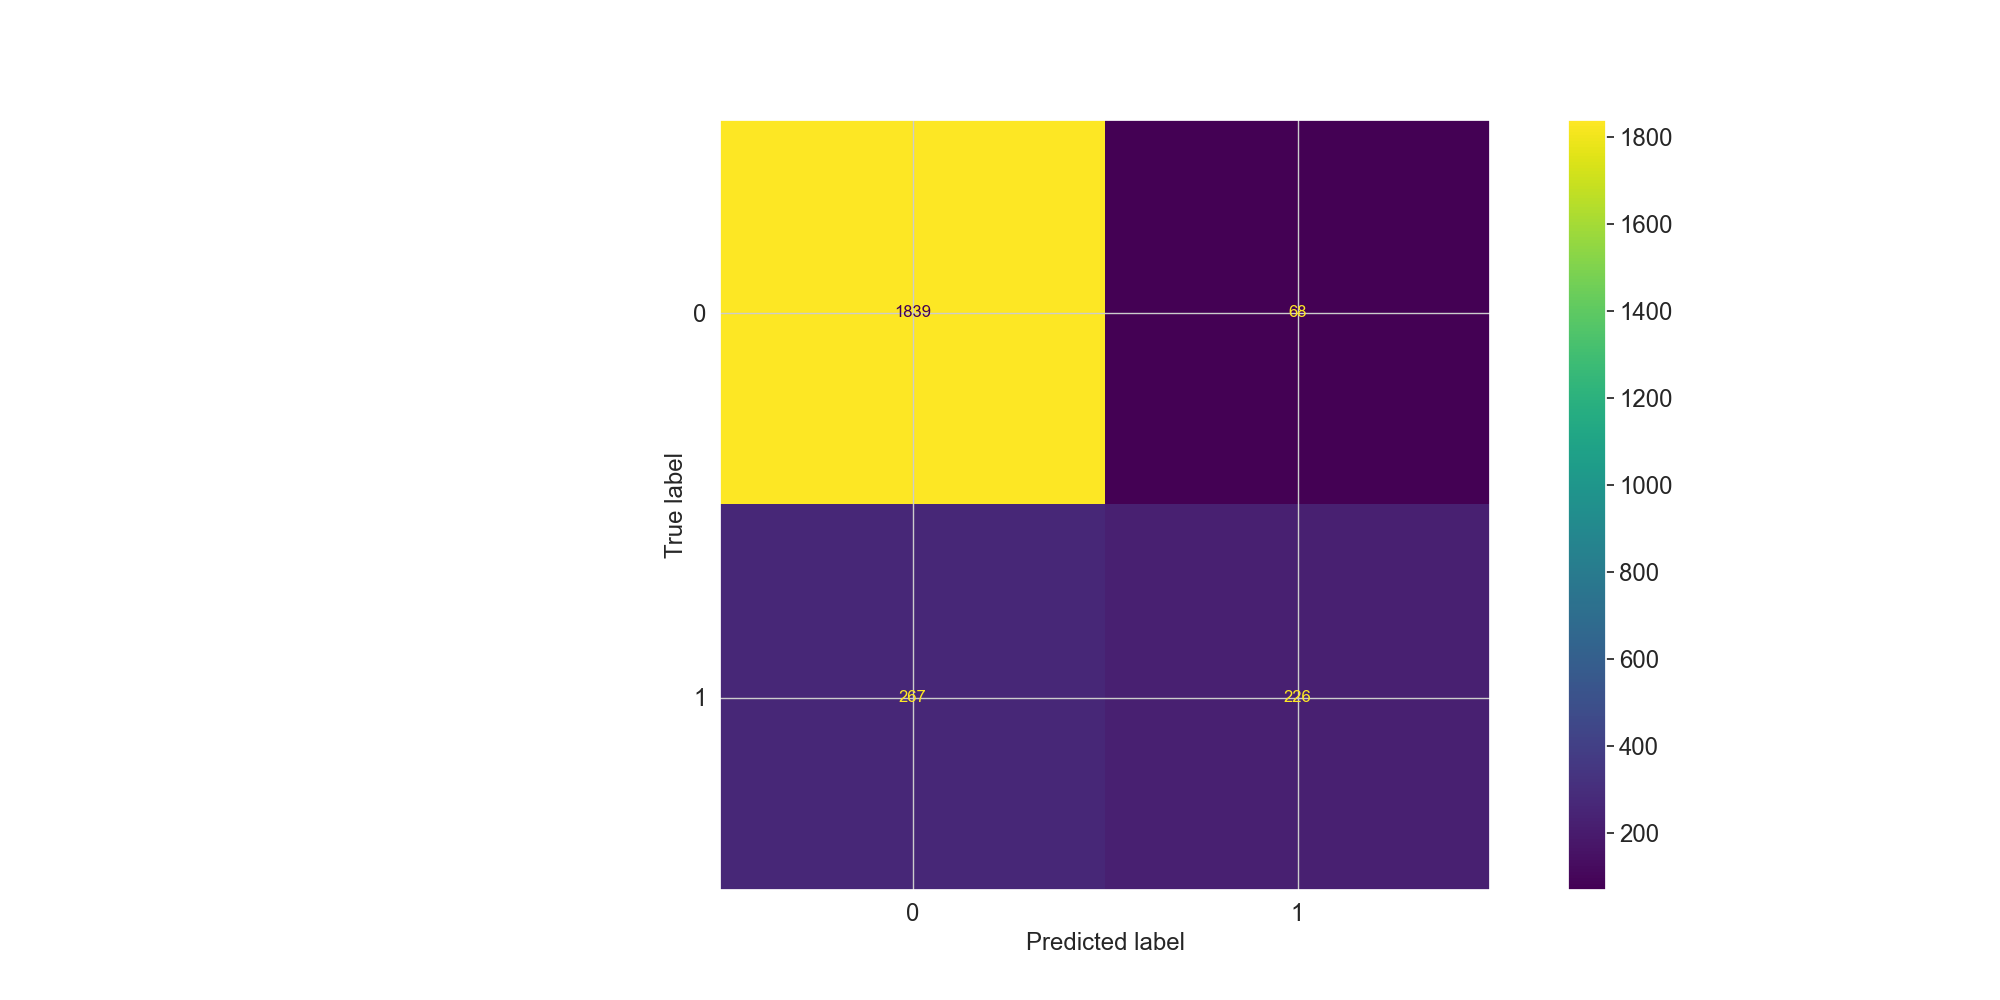
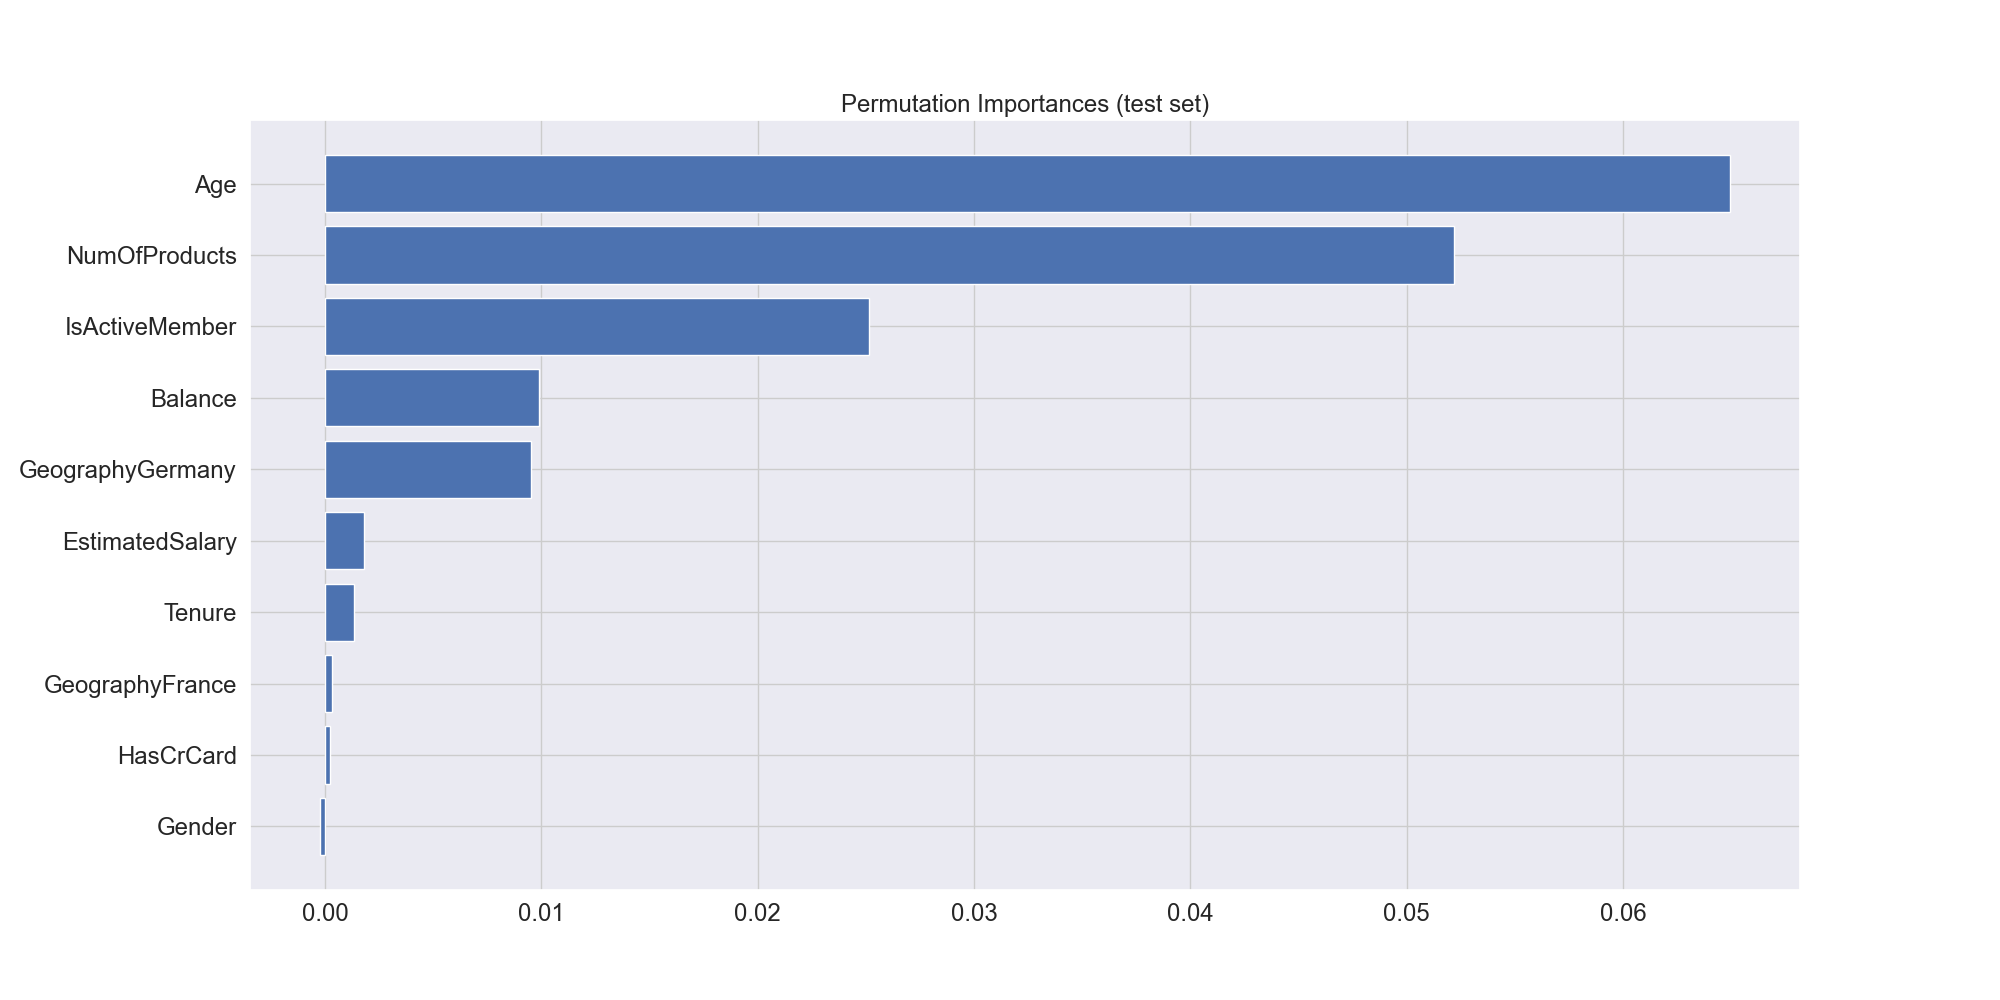
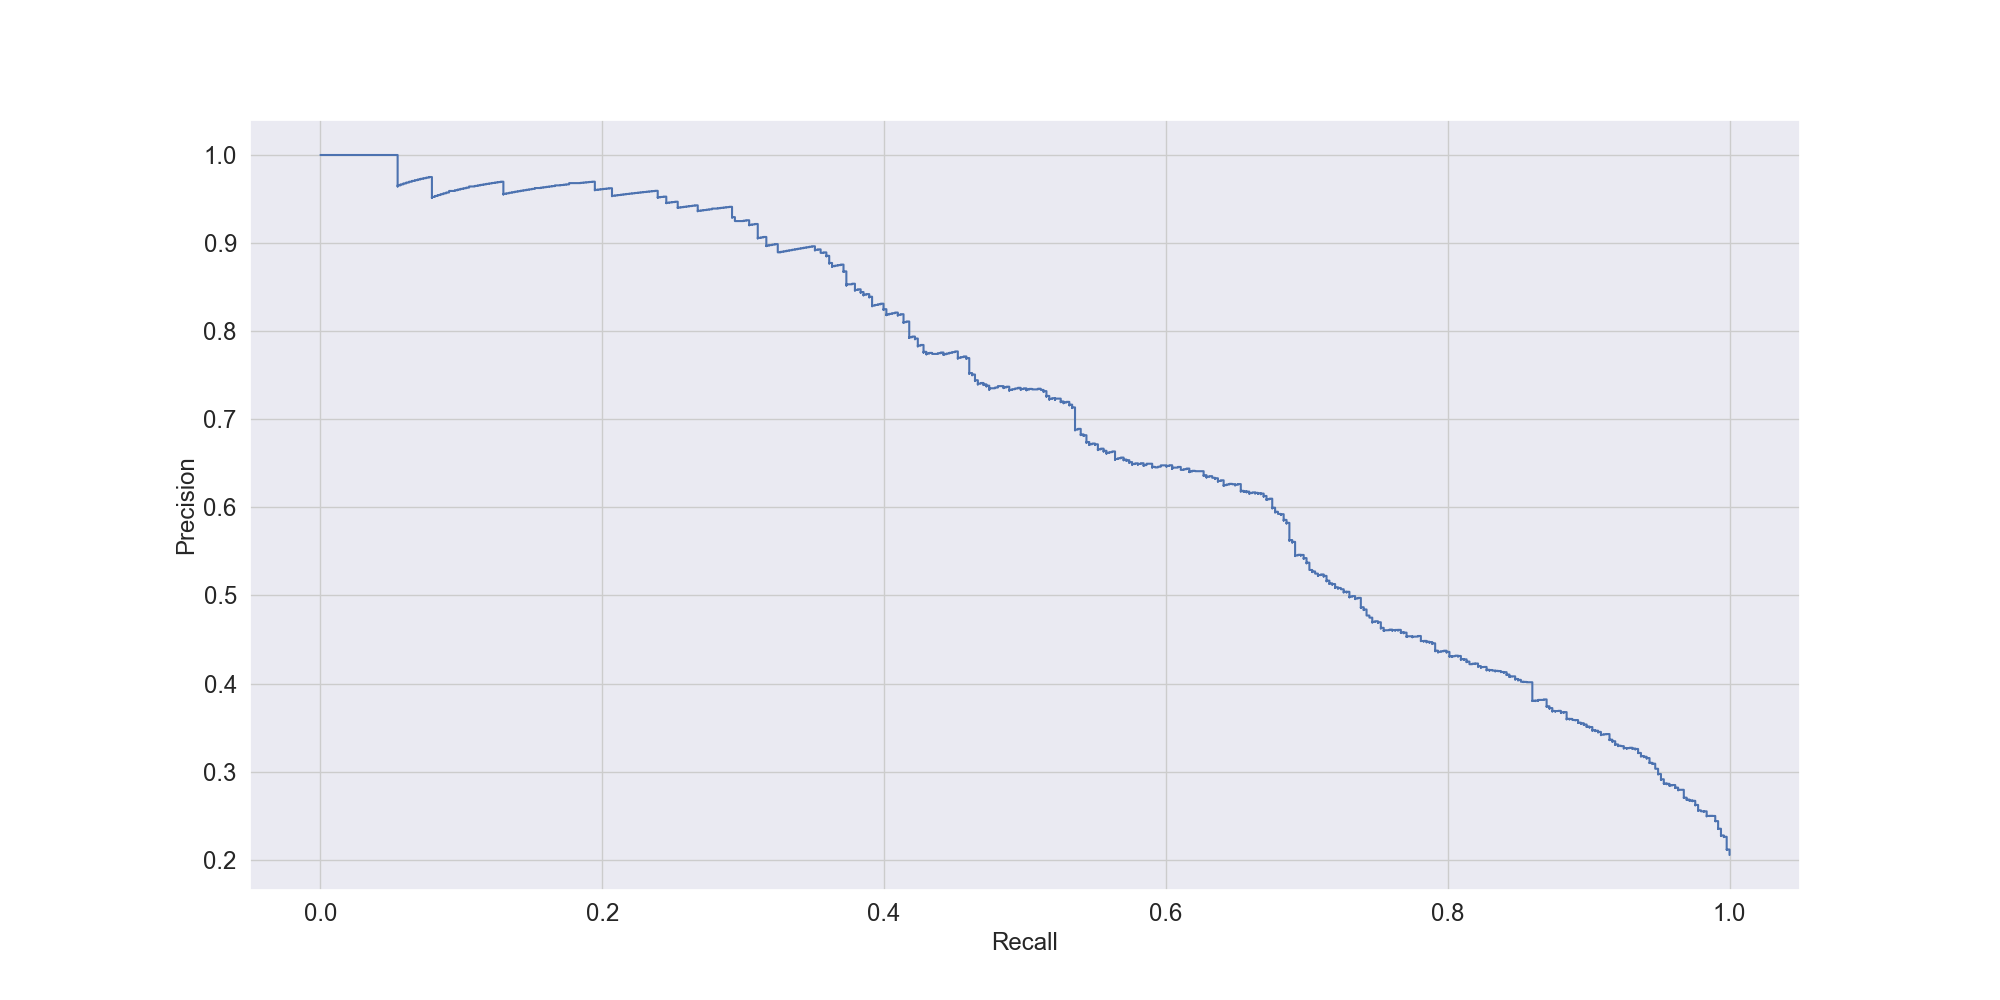
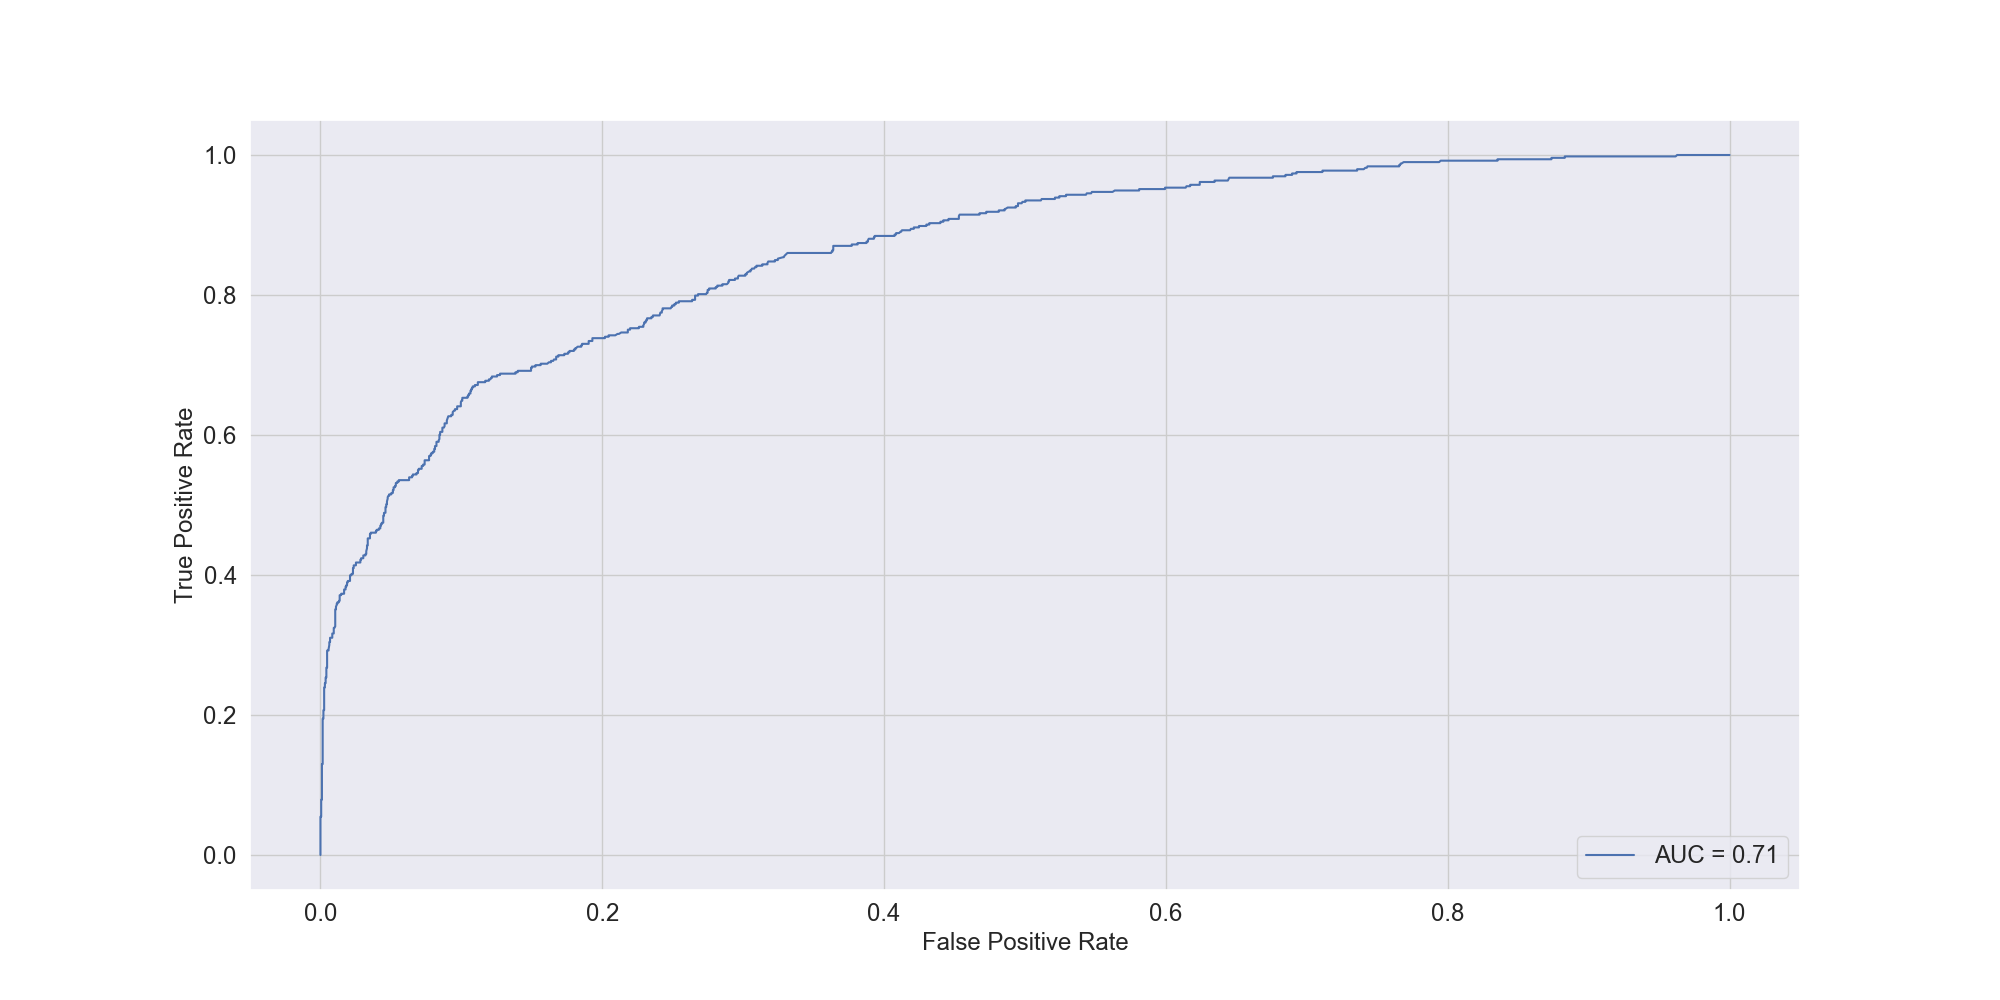
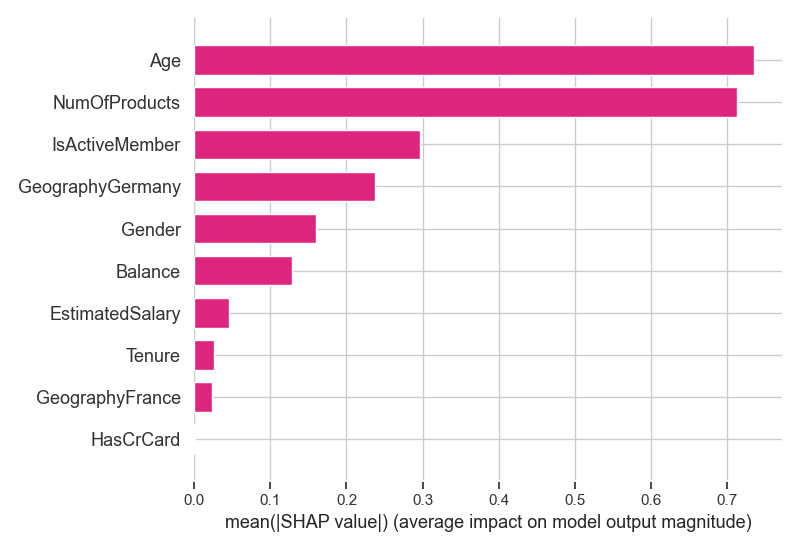
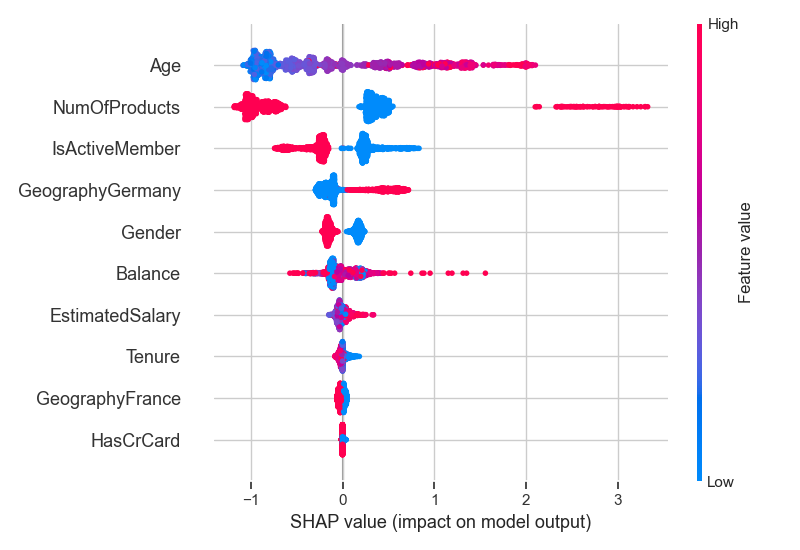

In [9]:
# send=False here to not overwrite the results from the LogisticRegression model. In practice, this would be under
# a different VM Project ID
vm.run_test_plan("sklearn_classifier", model=vm_model, train_ds=vm_train_ds, test_ds=vm_test_ds, send=False)